<a href="https://colab.research.google.com/github/Aravind-11/IITM_Saastra/blob/main/rl_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
# Stable Baselines only supports tensorflow 1.x for now
%tensorflow_version 1.x
!pip install stable-baselines[mpi]==2.10.0

TensorFlow 1.x selected.
     |████████████████████████████████| 248 kB 2.3 MB/s 
  Attempting uninstall: stable-baselines
    Found existing installation: stable-baselines 2.2.1
    Uninstalling stable-baselines-2.2.1:
      Successfully uninstalled stable-baselines-2.2.1


In [3]:
import numpy as np
import gym
from random import random 
class Football:  # The class encapsulating the environment
    '''
    Actions [0 : Stand, 1 : Up, 2 : Right, 3 : Down, 4 : Left]
    These are the representing no.s for the mentioned actions
    '''

    def __init__(self, length=30, width=30, goalPositions=[15,29]):
        
        # The player start at random locations
        
        self.pA=[0,15] 
        self.pO=[6,8]
            
        
        self.h = length   # Length of the Football Pitch    
        self.w = width    # Width of the Football Pitch
        
        self.goalPositions = np.array(goalPositions)   # This means that the middle 4 positions at the right and left are the goals
        
     
        
        self.reward = 0                            # Initially the reward is 0
        
        self.observation=np.random.rand(6,)
        self.done = bool(0)                          # This stores whether the game needs to be restart with new position (in the case of a goal)

    def reset(self):
        self.done = bool(0)
        self.reward = 0
        
        self.pA = np.array([np.random.randint(self.h), np.random.randint(self.h)])
        #self.pO=[6,8]
        self.x_traj,self.y_traj=[],[]
        return np.array((*self.pA,(15-self.pA[0]),(15-self.pA[1]),self.theta,*self.pO)).astype(np.float32)

    def step(self, action):
        if self.done == bool(1):
          self.reset()
        self.move(first, action)                   # We chose the first player at random
        if self.done == bool(1):
          return self.observation, self.reward, self.done
        if not done:
            self.current_player_num = (self.current_player_num + 1) % 2   
        return self.observation,self.reward, self.done,{}

    def move(self, player, action):
        opponent = 1 - player
        
        newPosition = self.pA + self.actionToMove(action)
        
        if self.ballOwner is player and self.isInGoal(*newPosition) >= 0:
            self.done = bool(1)
            return 1 - self.isInGoal(*newPosition)
        # If it's in the board
        elif self.isInBoard(*newPosition):
            self.positions[player] = newPosition
        if(self.ballOwner!=0):
          self.reward=-1
        return -1



    def isInBoard(self, x, y):
        if(x<0 or x>(30)):
          return 0
        if(y<0 or y>(30)):
          return 0 
        return 1
        

    #def choosePlayer(self):
    #    return np.random.randint(0, 2)
    def render(self,mode="human"):
        

        plt.cla()
        plt.arrow(x_start, y_start, np.cos(theta_start),
                      np.sin(theta_start), color='r', width=0.1)
        plt.arrow(x_goal, y_goal, np.cos(theta_goal),
                      np.sin(theta_goal), color='g', width=0.1)
        plot_vehicle(x, y, theta, x_traj, y_traj)

class modf_football(Football,gym.Env):
  def __init__(self, length=30, width=30, goalPositions=[29, 15]):
    super().__init__()
    self.observation_space=gym.spaces.Box(low=-30, high=60,
                                        shape=(7,), dtype=np.float32)
    self.reward=0
    self.action_space = gym.spaces.Box(
            low=-2*np.pi, high=2*np.pi, shape=(2,), dtype=np.float32
        )
    self.name='Football'
    self.current_player_num=0
    self.observation=np.random.rand(6,)
    self.pA = np.array([5,15])
    self.Kp_rho = 9
    self.dt=0.01
    self.Kp_alpha = 15
    self.Kp_beta = -3
    self.x_goal = 19
    self.y_goal = 15
    self.theta_goal = 0 
    self.theta_start = 2 * np.pi * random() - np.pi
    
    self.theta = self.theta_start

    self.x_diff = self.x_goal - self.pA[0]
    self.y_diff = self.y_goal - self.pA[1]

    self.x_traj, self.y_traj = [], []
    self.x_start=self.pA[0]
    self.y_start=self.pA[1]
    self.rho = np.hypot(self.x_diff, self.y_diff)
  #modifying the step and move function to get the updated reward system
  def step(self, action):
        
        #print('action',action)
        if self.done == bool(1):
          self.reset()
        
      
        self.move(action)                   # We chose the first player at random
        if self.done == bool(1):
          return self.observation, self.reward, self.done,{}
                   
        return self.observation,self.reward, self.done,{}
  
  def move(self, action):
        self.x_diff = self.x_goal - self.pA[0]
        self.y_diff = self.y_goal - self.pA[1]
        self.rho=np.hypot(self.x_diff,self.y_diff)
        v = self.Kp_rho * self.rho
        #v=9
        w = self.Kp_alpha * action[0] + self.Kp_beta * action[1]
        if action[0] > np.pi / 2 or action[0] < -np.pi / 2:
            v = -v
        elif (self.pA[0]==0 and self.pA[1]==29) or (self.pA[1]==0 and self.pA[0]==29):
          v=-v
        self.theta = self.theta + w * self.dt
        x = self.pA[0] +  v* np.cos(self.theta) * self.dt
        y = self.pA[1] +  v* np.sin(self.theta) * self.dt
        newPosition = np.array([x,y])
        self.x_traj.append(x)
        self.y_traj.append(y)
        ''' if (self.pO[0]>self.pA[0]):
          self.pO[0]-=1
        elif (self.pO[0]<self.pA[0]):
          self.pO[0]+=1
        if (self.pO[1]>self.pA[1]):
          self.pO[1]-=1
        elif (self.pO[1]<self.pA[1]):
          self.pO[1]+=1
        
        self.pO[0]=max(self.pO[0],0)
        self.pO[0]=min(self.pO[0],29)
        self.pO[1]=max(self.pO[1],0)
        self.pO[1]=min(self.pO[1],29)
        '''

        if self.isInGoal(*newPosition) >= 0:
            
            self.done = bool(1)
            return 1 - self.isInGoal(*newPosition)
        # If it's in the board
        if self.isInBoard(*newPosition):
               
            self.reward = -0.1 * ((abs((self.pA[0]-self.goalPositions[0])))+(abs(self.pA[1]-self.goalPositions[1]))) +0*(abs(newPosition[0]-self.pO[0])+abs(newPosition[1]-self.pO[1]))
            self.pA = newPosition

        
        self.observation=np.array((*self.pA,(15-self.pA[0]),(15-self.pA[1]),self.theta,*self.pO)).astype(np.float32)
        return -1
  def isInGoal(self, x, y):
     x_diff = self.x_goal - x
     y_diff = self.y_goal - y
     rho = np.hypot(x_diff, y_diff)
     if(rho<0.001):
       self.done=bool(1)
       self.reward=20  
     return -1
  def transformation_matrix(self,x, y, theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), x],
        [np.sin(theta), np.cos(theta), y],
        [0, 0, 1]
    ])
  def plot_vehicle(self,x, y, theta, x_traj, y_traj):  # pragma: no cover
    # Corners of triangular vehicle when pointing to the right (0 radians)
    p1_i = np.array([0.5, 0, 1]).T
    p2_i = np.array([-0.5, 0.25, 1]).T
    p3_i = np.array([-0.5, -0.25, 1]).T

    T = self.transformation_matrix(x, y, theta)
    p1 = np.matmul(T, p1_i)
    p2 = np.matmul(T, p2_i)
    p3 = np.matmul(T, p3_i)
    
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k-')
    plt.plot([p2[0], p3[0]], [p2[1], p3[1]], 'k-')
    plt.plot([p3[0], p1[0]], [p3[1], p1[1]], 'k-')
    plt.style.use('seaborn')
    plt.scatter([5,10,15],[17,10,12],s=100,c='green',edgecolor='black',linewidth=1,alpha=0.75) 
    plt.style.use('seaborn')
    plt.scatter([18],[15],s=100,c='red',edgecolor='black',linewidth=2,alpha=0.75)   
    plt.plot(x_traj, y_traj, 'b--')
    #circle1 = plt.Circle((0, 0), 0.2, color='r')
    #fig, ax = plt.subplots()
    
    # for stopping simulation with the esc key.
    plt.gcf().canvas.mpl_connect('key_release_event',
            lambda event: [exit(0) if event.key == 'escape' else None])
    
    plt.xlim(0, 30)
    plt.ylim(0, 30)
    
    plt.pause(self.dt)
  def render(self,mode="human"):
        

        plt.cla()
        plt.arrow(self.x_start, self.y_start, np.cos(self.theta_start),
                      np.sin(self.theta_start), color='r', width=0.1)
        plt.arrow(self.x_goal, self.y_goal, np.cos(self.theta_goal),
                      np.sin(self.theta_goal), color='g', width=0.1)
        self.plot_vehicle(self.pA[0], self.pA[1], self.theta, self.x_traj, self.y_traj)
  def seed():
      return 0 
  def metadata(x):
      return 0 
  def legal_actions(self):
    return gym.spaces.Discrete(5)
  def close(self):
    pass

env=modf_football(Football,gym.Env)

In [5]:
from stable_baselines.common.env_checker import check_env

check_env(env, warn=True)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/common/env_checker.py:210: UserWarning: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) cf https://stable-baselines.readthedocs.io/en/master/guide/rl_tips.html
  warnings.warn("We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) "


In [4]:
from stable_baselines import DQN, PPO2, A2C, ACKTR
from stable_baselines.common.cmd_util import make_vec_env

env = make_vec_env(lambda: env, n_envs=1)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [5]:
model = PPO2('MlpPolicy', env, verbose=1).learn(50000)

Streaming output truncated to the last 5000 lines.
| n_updates          | 6              |
| policy_entropy     | 2.836028       |
| policy_loss        | -0.00040700444 |
| serial_timesteps   | 768            |
| time_elapsed       | 1.27           |
| total_timesteps    | 768            |
| value_loss         | 75.238205      |
---------------------------------------
--------------------------------------
| approxkl           | 0.00016663951 |
| clipfrac           | 0.0           |
| explained_variance | -0.0512       |
| fps                | 784           |
| n_updates          | 7             |
| policy_entropy     | 2.8353863     |
| policy_loss        | -0.0008414758 |
| serial_timesteps   | 896           |
| time_elapsed       | 1.43          |
| total_timesteps    | 896           |
| value_loss         | 1114.607      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0008040714  |
| clipfrac           | 0.0           |
| exp

Step 1
Action:  [[-0.6228195  1.2389033]]
obs= [[ 1.3238281e+01  2.8482140e+01  1.7617184e+00 -1.3482140e+01
  -1.8217524e+03  6.0000000e+00  8.0000000e+00]] reward= [-0.4] done= [False]


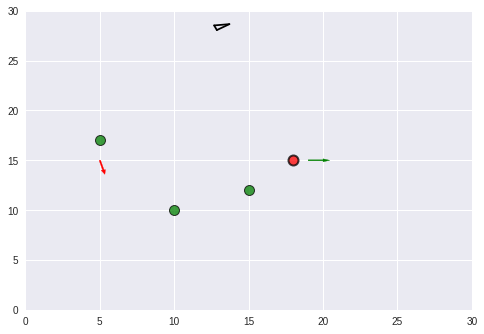

Step 2
Action:  [[-0.6228195  1.2389033]]
obs= [[ 1.4519790e+01  2.8796713e+01  4.8020995e-01 -1.3796713e+01
  -1.8218831e+03  6.0000000e+00  8.0000000e+00]] reward= [-0.22795787] done= [False]


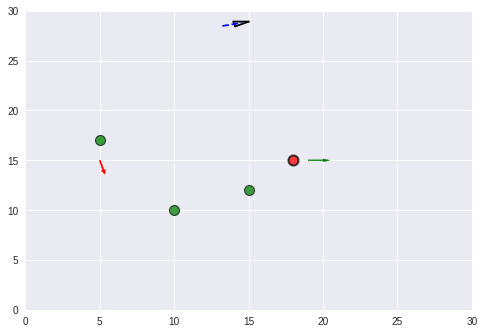

Step 3
Action:  [[-0.6228195  1.2389033]]
obs= [[ 1.5817414e+01  2.8940191e+01 -8.1741440e-01 -1.3940190e+01
  -1.8220137e+03  6.0000000e+00  8.0000000e+00]] reward= [-0.06834967] done= [False]


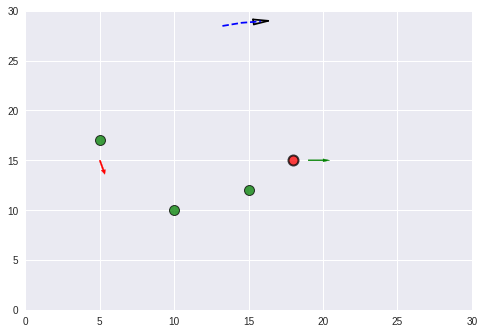

Step 4
Action:  [[-0.6228195  1.2389033]]
obs= [[   17.104044     28.913853     -2.1040435   -13.913853  -1822.1442
      6.            8.       ]] reward= [-0.08772238] done= [False]


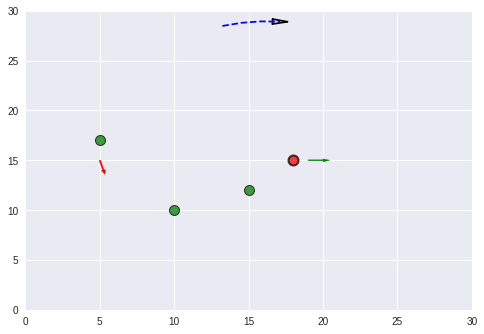

Step 5
Action:  [[-0.6228195  1.2389033]]
obs= [[   18.35347      28.723667     -3.3534706   -13.723667  -1822.2748
      6.            8.       ]] reward= [-0.21901911] done= [False]


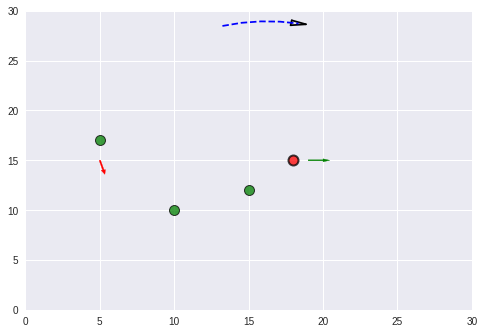

Step 6
Action:  [[-0.6228195  1.2389033]]
obs= [[   19.54125      28.379995     -4.5412507   -13.379995  -1822.4054
      6.            8.       ]] reward= [-0.3629803] done= [False]


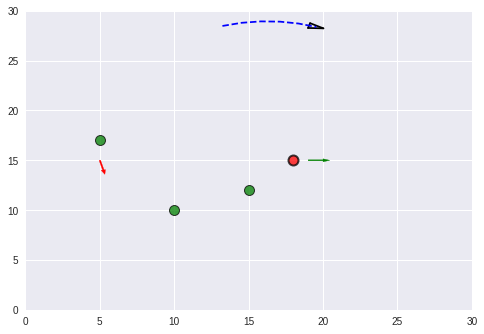

Step 7
Action:  [[-0.6228195  1.2389033]]
obs= [[   20.645473     27.897125     -5.6454725   -12.897125  -1822.536
      6.            8.       ]] reward= [-0.5161255] done= [False]


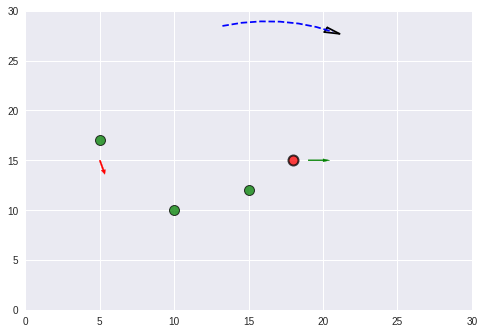

Step 8
Action:  [[-0.6228195  1.2389033]]
obs= [[   21.647415    27.292673    -6.647415   -12.292673 -1822.6666
      6.           8.      ]] reward= [-0.6748347] done= [False]


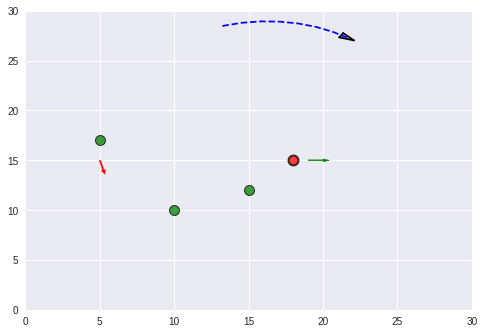

Step 9
Action:  [[-0.6228195  1.2389033]]
obs= [[   22.532064     26.58687      -7.5320644   -11.58687   -1822.7971
      6.            8.       ]] reward= [-0.83547425] done= [False]


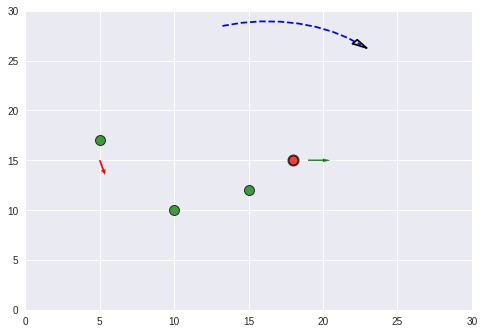

Step 10
Action:  [[-0.6228195  1.2389033]]
obs= [[   23.28847     25.801775    -8.288468   -10.801776 -1822.9277
      6.           8.      ]] reward= [-0.99451935] done= [False]


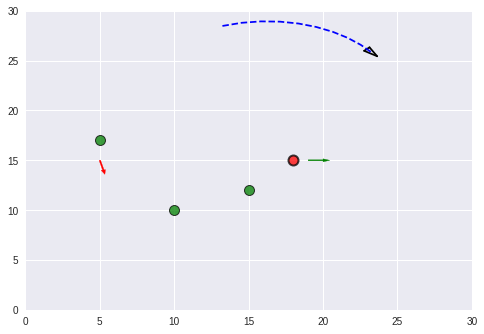

Step 11
Action:  [[-0.6228195  1.2389033]]
obs= [[   23.909925    24.960436    -8.909925    -9.960436 -1823.0583
      6.           8.      ]] reward= [-1.1486692] done= [False]


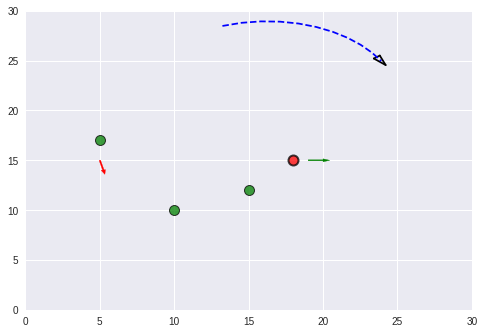

Step 12
Action:  [[-0.6228195  1.2389033]]
obs= [[   24.393991    24.086048    -9.393991    -9.086049 -1823.189
      6.           8.      ]] reward= [-1.2949489] done= [False]


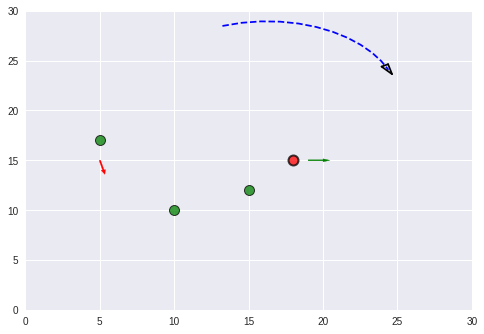

Step 13
Action:  [[-0.6228195  1.2389033]]
obs= [[   24.742329    23.201155    -9.742329    -8.201155 -1823.3195
      6.           8.      ]] reward= [-1.4307944] done= [False]


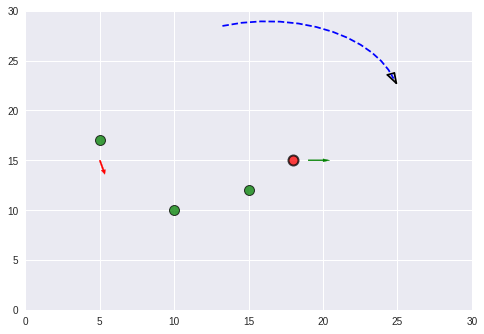

Step 14
Action:  [[-0.6228195  1.2389033]]
obs= [[   24.960384    22.326887    -9.960383    -7.326888 -1823.4501
      6.           8.      ]] reward= [-1.5541174] done= [False]


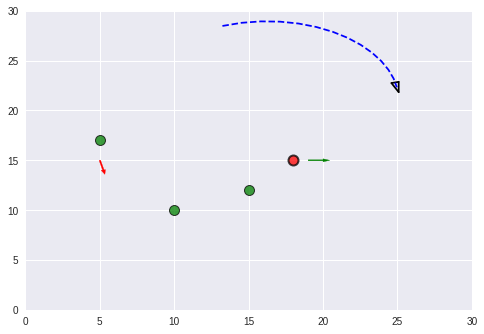

Step 15
Action:  [[-0.6228195  1.2389033]]
obs= [[   25.056944    21.482334   -10.056943    -6.482333 -1823.5807
      6.           8.      ]] reward= [-1.6633495] done= [False]


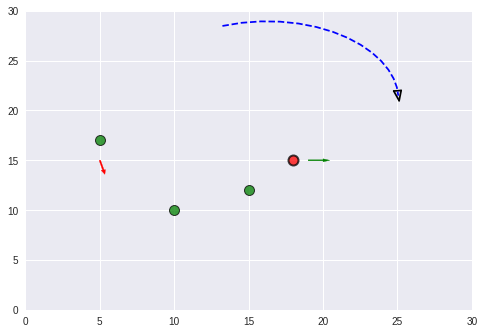

Step 16
Action:  [[-0.6228195  1.2389033]]
obs= [[   25.043568     20.683992    -10.043569     -5.6839914 -1823.7113
      6.            8.       ]] reward= [-1.7574611] done= [False]


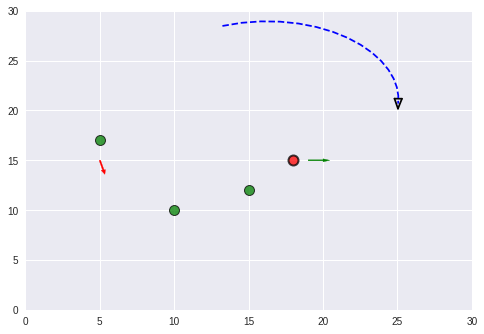

Step 17
Action:  [[-0.6228195  1.2389033]]
obs= [[   24.933947    19.945395    -9.933948    -4.945394 -1823.8419
      6.           8.      ]] reward= [-1.8359576] done= [False]


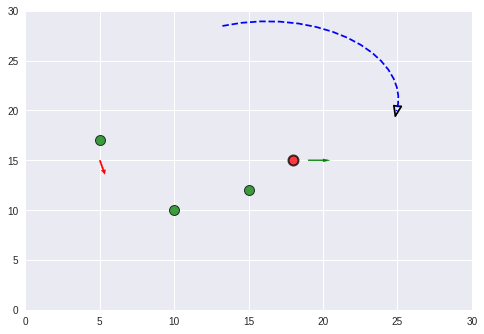

Step 18
Action:  [[-0.6228195  1.2389033]]
obs= [[   24.743204    19.276863    -9.743204    -4.276863 -1823.9724
      6.           8.      ]] reward= [-1.8988553] done= [False]


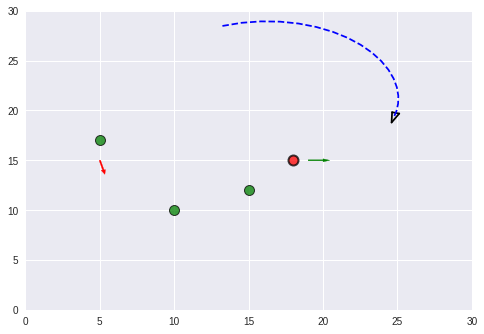

Step 19
Action:  [[-0.6228195  1.2389033]]
obs= [[   24.487188    18.685432    -9.487188    -3.685432 -1824.103
      6.           8.      ]] reward= [-1.9466342] done= [False]


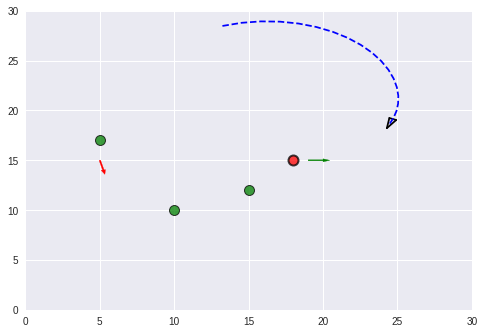

Step 20
Action:  [[-0.6228195  1.2389033]]
obs= [[   24.181784     18.174911     -9.181784     -3.1749122 -1824.2336
      6.            8.       ]] reward= [-1.9801756] done= [False]


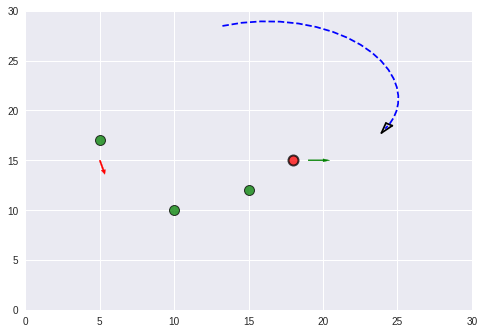

Step 21
Action:  [[-0.6228195  1.2389033]]
obs= [[   23.842272     17.746109     -8.842271     -2.7461097 -1824.3643
      6.            8.       ]] reward= [-2.0006871] done= [False]


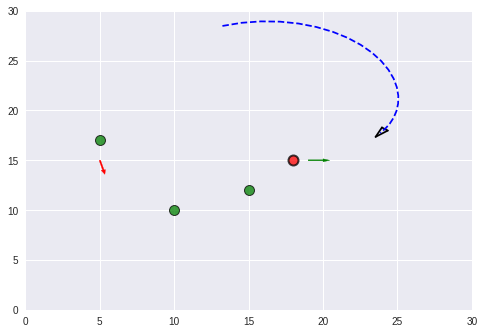

Step 22
Action:  [[-0.6228195  1.2389033]]
obs= [[   23.482769     17.39716      -8.482768     -2.3971593 -1824.4949
      6.            8.       ]] reward= [-2.0096161] done= [False]


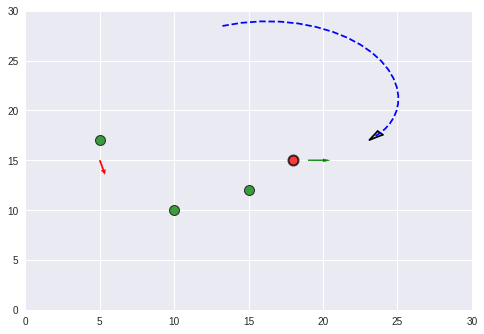

Step 23
Action:  [[-0.6228195  1.2389033]]
obs= [[   23.115776    17.123966    -8.115777    -2.123967 -1824.6254
      6.           8.      ]] reward= [-2.008561] done= [False]


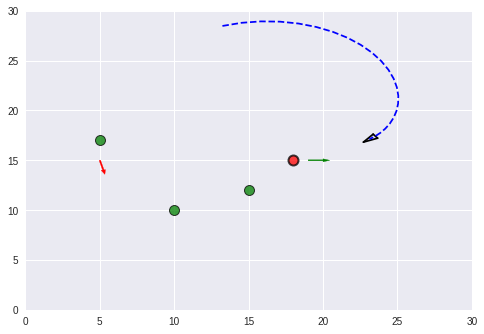

Step 24
Action:  [[-0.6228195  1.2389033]]
obs= [[   22.751848     16.920723     -7.751848     -1.9207232 -1824.756
      6.            8.       ]] reward= [-1.999181] done= [False]


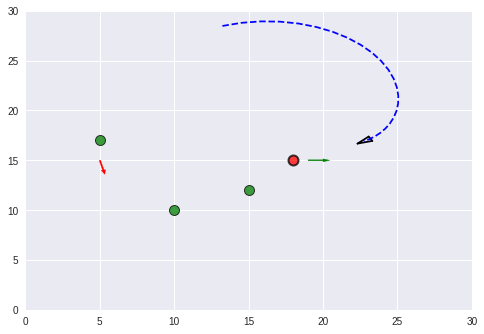

Step 25
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.2399389e+01  1.6780464e+01 -7.3993883e+00 -1.7804633e+00
  -1.8248866e+03  6.0000000e+00  8.0000000e+00]] reward= [-1.9831125] done= [False]


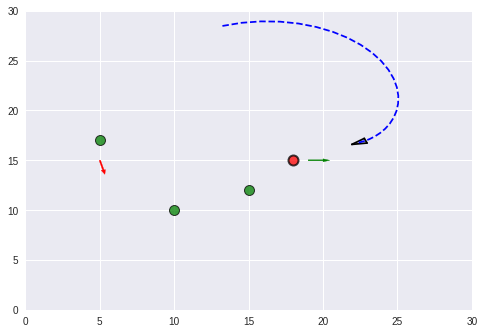

Step 26
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.2064598e+01  1.6695639e+01 -7.0645981e+00 -1.6956389e+00
  -1.8250172e+03  6.0000000e+00  8.0000000e+00]] reward= [-1.9618925] done= [False]


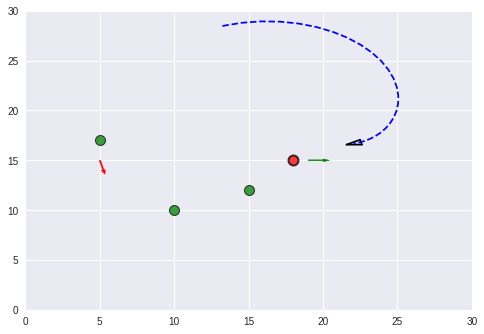

Step 27
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.1751556e+01  1.6658669e+01 -6.7515554e+00 -1.6586690e+00
  -1.8251478e+03  6.0000000e+00  8.0000000e+00]] reward= [-1.936896] done= [False]


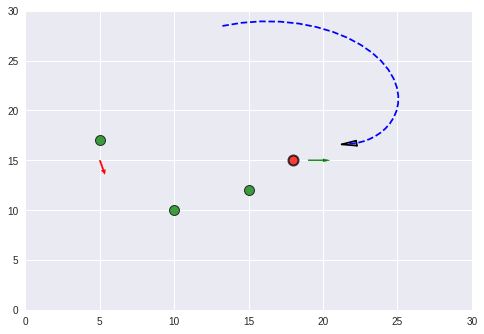

Step 28
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.1462425e+01  1.6662437e+01 -6.4624262e+00 -1.6624383e+00
  -1.8252783e+03  6.0000000e+00  8.0000000e+00]] reward= [-1.9092886] done= [False]


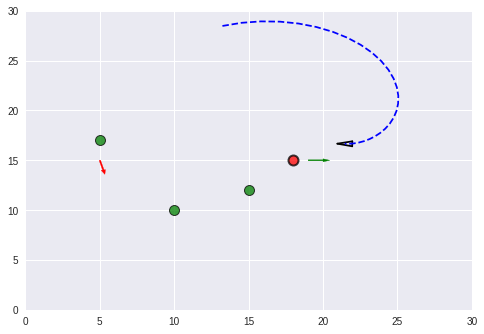

Step 29
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.1197783e+01  1.6700712e+01 -6.1977830e+00 -1.7007114e+00
  -1.8254089e+03  6.0000000e+00  8.0000000e+00]] reward= [-1.8799988] done= [False]


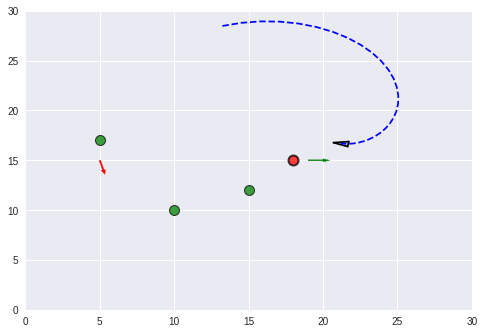

Step 30
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.0957020e+01  1.6768438e+01 -5.9570203e+00 -1.7684385e+00
  -1.8255396e+03  6.0000000e+00  8.0000000e+00]] reward= [-1.8497071] done= [False]


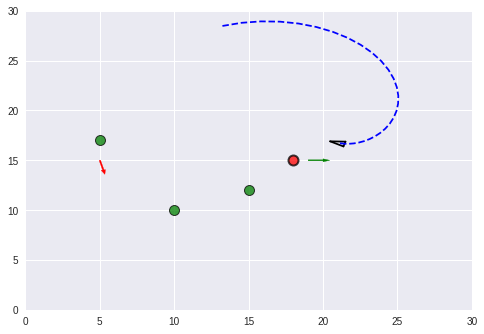

Step 31
Action:  [[-0.6228195  1.2389033]]
obs= [[   20.738817     16.861933     -5.7388163    -1.8619324 -1825.6702
      6.            8.       ]] reward= [-1.8188581] done= [False]


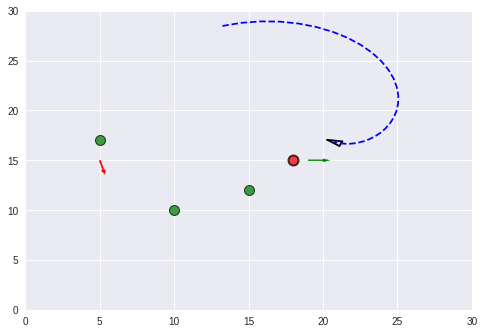

Step 32
Action:  [[-0.6228195  1.2389033]]
obs= [[   20.541616     16.978909     -5.541617     -1.9789089 -1825.8008
      6.            8.       ]] reward= [-1.7876884] done= [False]


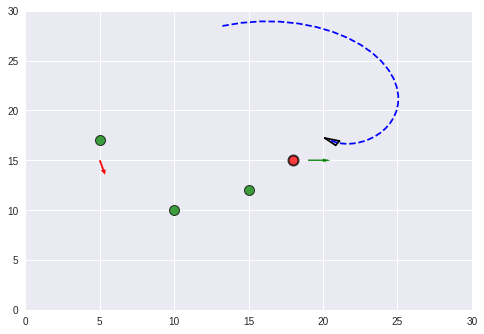

Step 33
Action:  [[-0.6228195  1.2389033]]
obs= [[   20.364094     17.118395     -5.3640947    -2.1183953 -1825.9313
      6.            8.       ]] reward= [-1.7562708] done= [False]


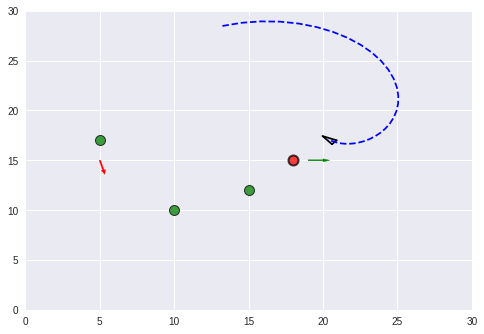

Step 34
Action:  [[-0.6228195  1.2389033]]
obs= [[   20.205551     17.280523     -5.205551     -2.2805235 -1826.0619
      6.            8.       ]] reward= [-1.7245699] done= [False]


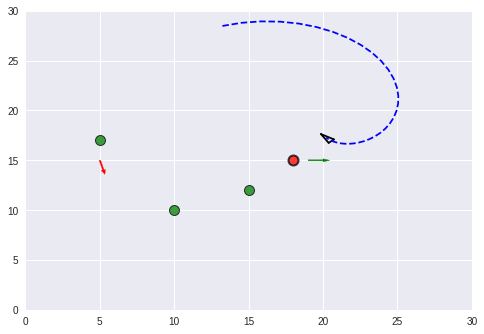

Step 35
Action:  [[-0.6228195  1.2389033]]
obs= [[   20.06623      17.466234     -5.066231     -2.4662342 -1826.1925
      6.            8.       ]] reward= [-1.6925027] done= [False]


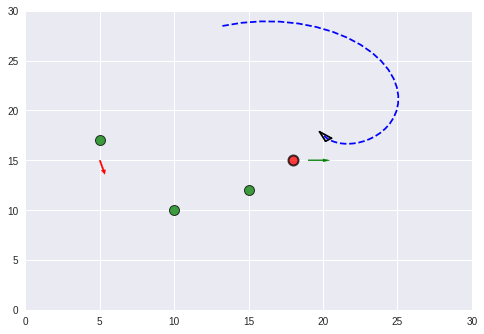

Step 36
Action:  [[-0.6228195  1.2389033]]
obs= [[   19.94754      17.676918     -4.9475403    -2.6769183 -1826.3231
      6.            8.       ]] reward= [-1.6599996] done= [False]


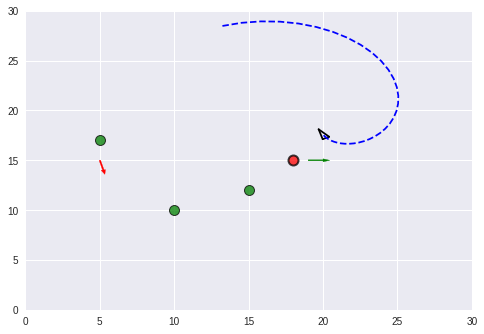

Step 37
Action:  [[-0.6228195  1.2389033]]
obs= [[   19.852163     17.914024     -4.852163     -2.9140244 -1826.4537
      6.            8.       ]] reward= [-1.6270622] done= [False]


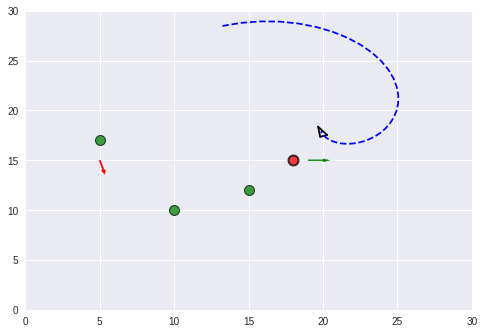

Step 38
Action:  [[-0.6228195  1.2389033]]
obs= [[   19.78407      18.17865      -4.784068     -3.1786497 -1826.5842
      6.            8.       ]] reward= [-1.5938139] done= [False]


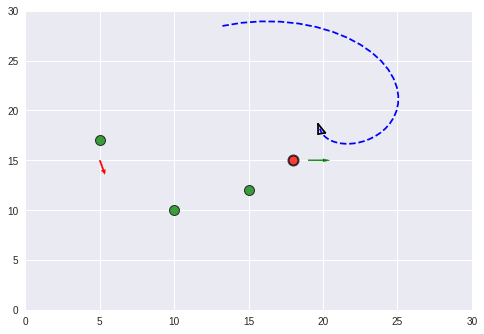

Step 39
Action:  [[-0.6228195  1.2389033]]
obs= [[   19.748423    18.471138    -4.748423    -3.471139 -1826.7148
      6.           8.      ]] reward= [-1.5605419] done= [False]


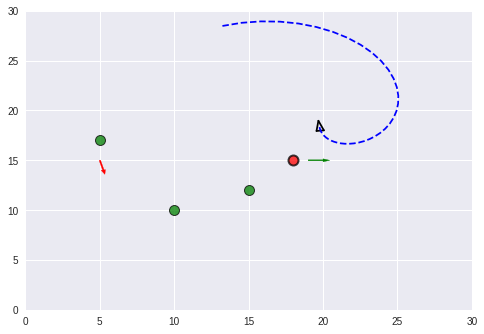

Step 40
Action:  [[-0.6228195  1.2389033]]
obs= [[   19.751402     18.790707     -4.7514014    -3.7907066 -1826.8455
      6.            8.       ]] reward= [-1.5277284] done= [False]


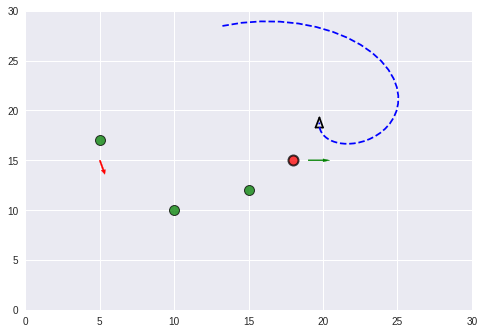

Step 41
Action:  [[-0.6228195  1.2389033]]
obs= [[   19.799904    19.135109    -4.799904    -4.13511  -1826.9761
      6.           8.      ]] reward= [-1.4960694] done= [False]


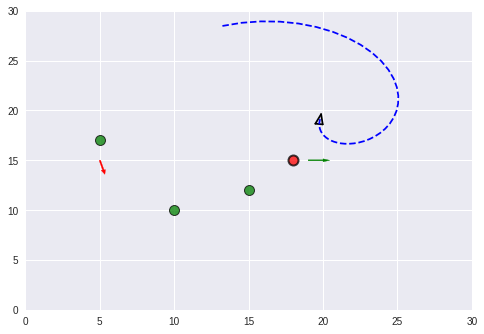

Step 42
Action:  [[-0.6228195  1.2389033]]
obs= [[   19.901194     19.500385     -4.901193     -4.5003853 -1827.1066
      6.            8.       ]] reward= [-1.4664794] done= [False]


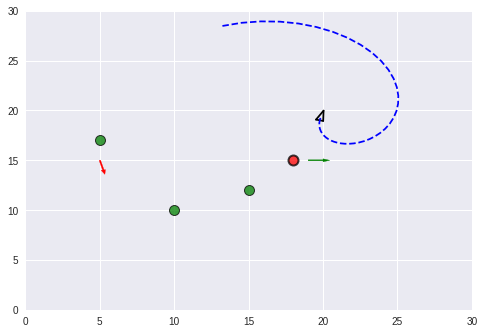

Step 43
Action:  [[-0.6228195  1.2389033]]
obs= [[   20.062468    19.880678    -5.062467    -4.880677 -1827.2372
      6.           8.      ]] reward= [-1.4400808] done= [False]


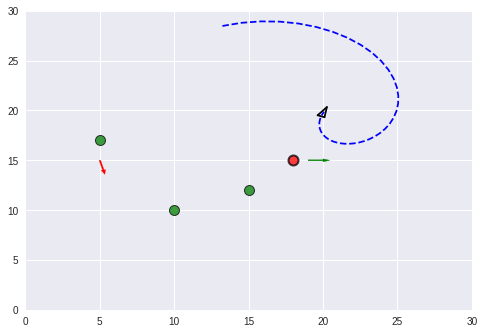

Step 44
Action:  [[-0.6228195  1.2389033]]
obs= [[   20.29038      20.26817      -5.29038      -5.2681684 -1827.3678
      6.            8.       ]] reward= [-1.4181789] done= [False]


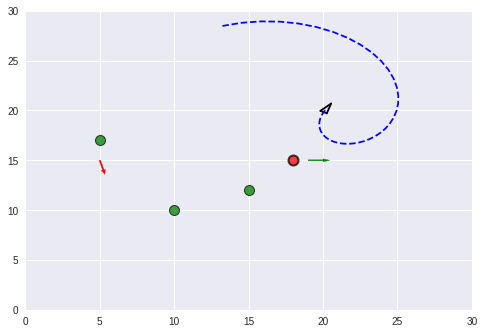

Step 45
Action:  [[-0.6228195  1.2389033]]
obs= [[   20.590548    20.653124    -5.590548    -5.653124 -1827.4984
      6.           8.      ]] reward= [-1.4022211] done= [False]


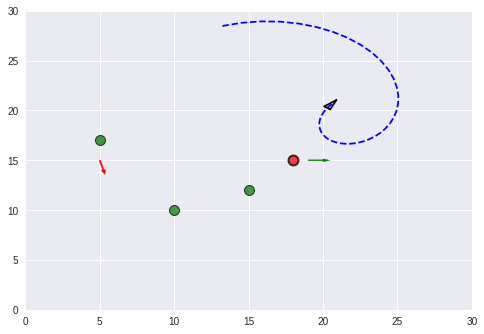

Step 46
Action:  [[-0.6228195  1.2389033]]
obs= [[   20.967058     21.024055     -5.9670577    -6.024056  -1827.629
      6.            8.       ]] reward= [-1.3937424] done= [False]


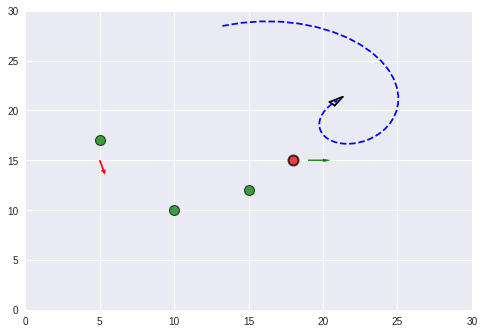

Step 47
Action:  [[-0.6228195  1.2389033]]
obs= [[   21.422009    21.36801     -6.422008    -6.36801  -1827.7595
      6.           8.      ]] reward= [-1.3943002] done= [False]


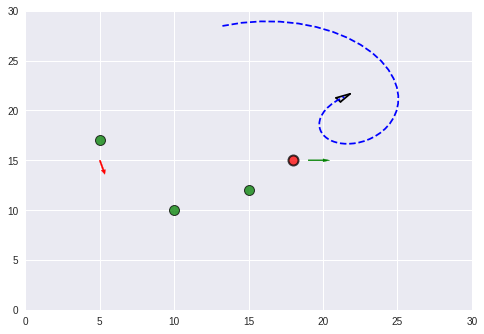

Step 48
Action:  [[-0.6228195  1.2389033]]
obs= [[   21.955118     21.670958     -6.955118     -6.6709566 -1827.8901
      6.            8.       ]] reward= [-1.4053998] done= [False]


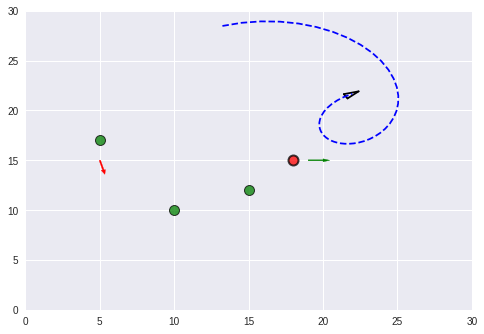

Step 49
Action:  [[-0.6228195  1.2389033]]
obs= [[   22.56342      21.91828      -7.563419     -6.9182796 -1828.0208
      6.            8.       ]] reward= [-1.4284161] done= [False]


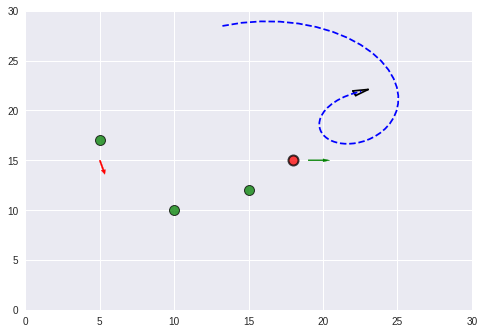

Step 50
Action:  [[-0.6228195  1.2389033]]
obs= [[   23.241055     22.095339     -8.241055     -7.0953393 -1828.1514
      6.            8.       ]] reward= [-1.4645139] done= [False]


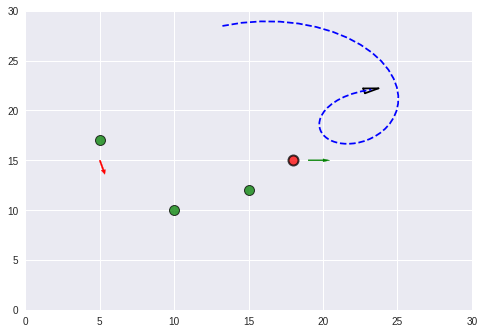

Step 51
Action:  [[-0.6228195  1.2389033]]
obs= [[   23.979212    22.188082    -8.979211    -7.188082 -1828.282
      6.           8.      ]] reward= [-1.5145715] done= [False]


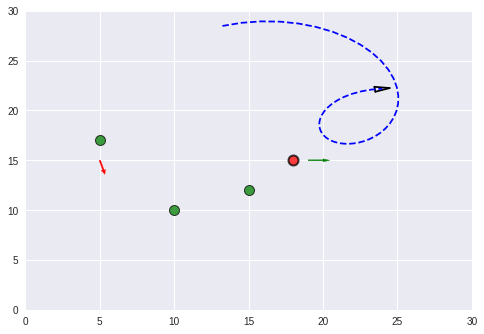

Step 52
Action:  [[-0.6228195  1.2389033]]
obs= [[   24.766176     22.183672     -9.766177     -7.1836724 -1828.4125
      6.            8.       ]] reward= [-1.5791129] done= [False]


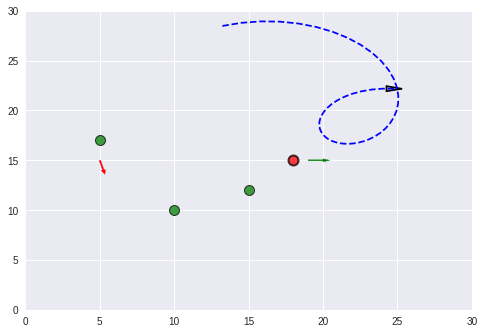

Step 53
Action:  [[-0.6228195  1.2389033]]
obs= [[   25.587545     22.07111     -10.587546     -7.0711102 -1828.5431
      6.            8.       ]] reward= [-1.6582505] done= [False]


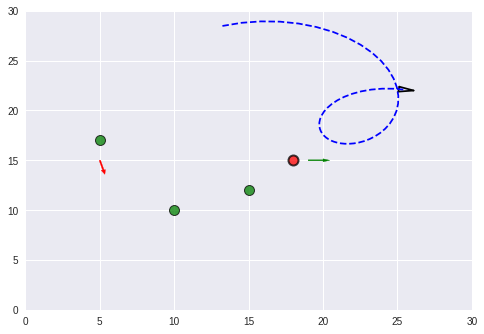

Step 54
Action:  [[-0.6228195  1.2389033]]
obs= [[   26.426552     21.84181     -11.426553     -6.8418107 -1828.6737
      6.            8.       ]] reward= [-1.7516435] done= [False]


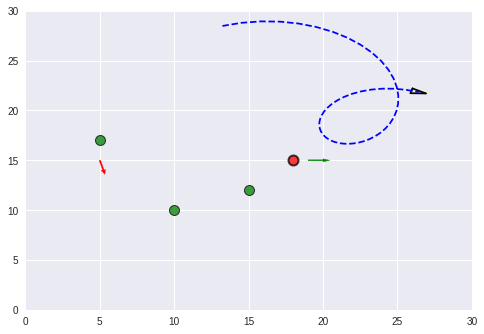

Step 55
Action:  [[-0.6228195  1.2389033]]
obs= [[   27.264536    21.490108   -12.264535    -6.490109 -1828.8043
      6.           8.      ]] reward= [-1.8584741] done= [False]


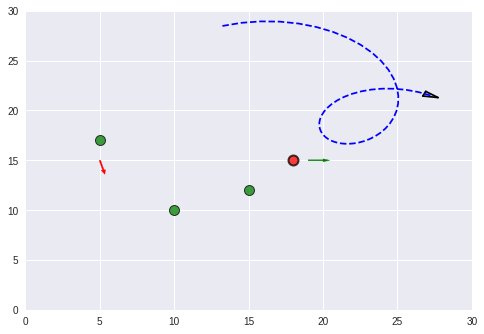

Step 56
Action:  [[-0.6228195  1.2389033]]
obs= [[   28.081503    21.013666   -13.081503    -6.013665 -1828.9349
      6.           8.      ]] reward= [-1.9774426] done= [False]


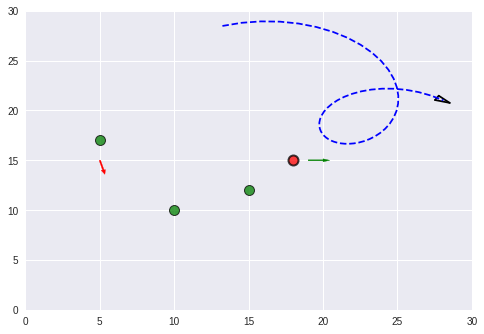

Step 57
Action:  [[-0.6228195  1.2389033]]
obs= [[   28.856792    20.413754   -13.856792    -5.413754 -1829.0654
      6.           8.      ]] reward= [-2.1067839] done= [False]


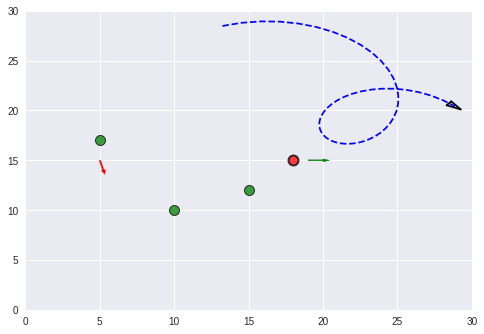

Step 58
Action:  [[-0.6228195  1.2389032]]
obs= [[   29.569777     19.695408    -14.569777     -4.6954083 -1829.196
      6.            8.       ]] reward= [-2.2443037] done= [False]


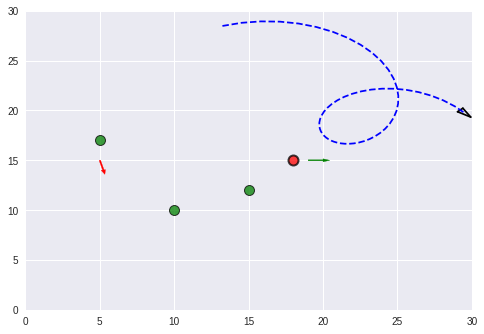

Step 59
Action:  [[-0.6228195  1.238903 ]]
obs= [[   29.569777     19.695408    -14.569777     -4.6954083 -1829.3267
      6.            8.       ]] reward= [-2.2443037] done= [False]


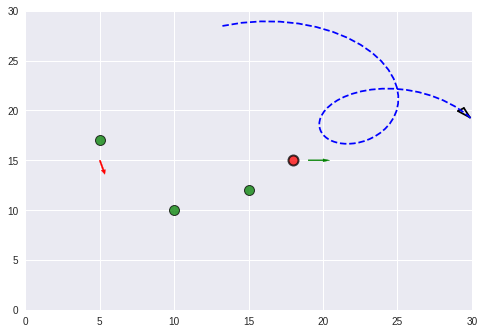

Step 60
Action:  [[-0.6228195  1.238903 ]]
obs= [[   29.569777     19.695408    -14.569777     -4.6954083 -1829.4573
      6.            8.       ]] reward= [-2.2443037] done= [False]


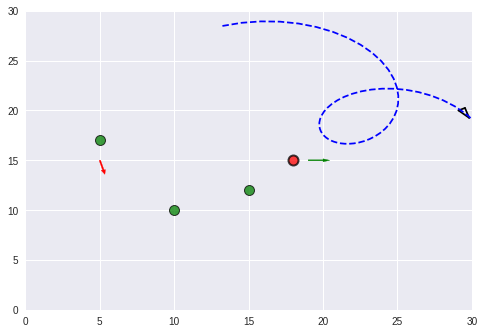

Step 61
Action:  [[-0.6228195  1.238903 ]]
obs= [[   29.965408     18.732607    -14.965408     -3.7326062 -1829.5879
      6.            8.       ]] reward= [-2.3874369] done= [False]


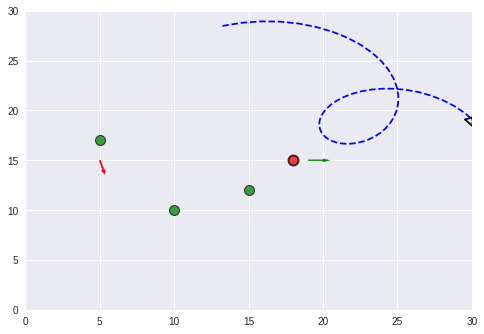

Step 62
Action:  [[-0.6228195  1.2389029]]
obs= [[   29.965408     18.732607    -14.965408     -3.7326062 -1829.7184
      6.            8.       ]] reward= [-2.3874369] done= [False]


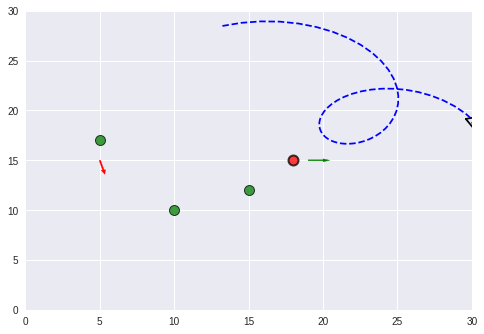

Step 63
Action:  [[-0.6228195  1.2389029]]
obs= [[   29.965408     18.732607    -14.965408     -3.7326062 -1829.849
      6.            8.       ]] reward= [-2.3874369] done= [False]


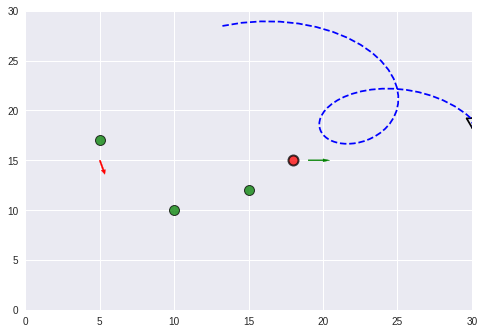

Step 64
Action:  [[-0.6228195  1.2389029]]
obs= [[   29.96344     17.690113   -14.963441    -2.690112 -1829.9796
      6.           8.      ]] reward= [-2.5232801] done= [False]


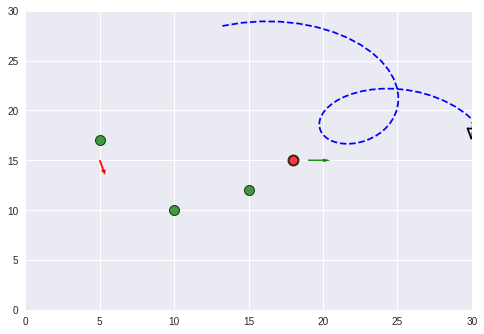

Step 65
Action:  [[-0.6228194  1.2389029]]
obs= [[ 2.9829239e+01  1.6683035e+01 -1.4829240e+01 -1.6830356e+00
  -1.8301102e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.627333] done= [False]


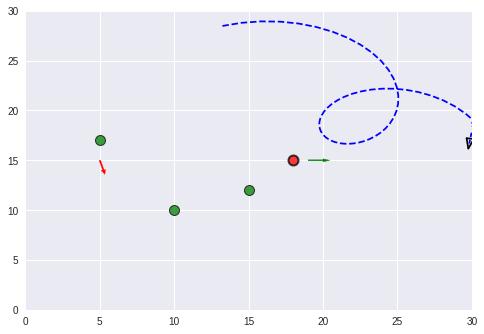

Step 66
Action:  [[-0.6228194  1.2389029]]
obs= [[ 2.9572750e+01  1.5730637e+01 -1.4572750e+01 -7.3063654e-01
  -1.8302408e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.7146204] done= [False]


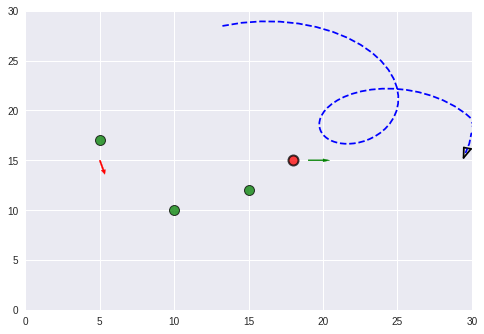

Step 67
Action:  [[-0.6228195  1.2389029]]
obs= [[ 2.9206896e+01  1.4849775e+01 -1.4206896e+01  1.5022506e-01
  -1.8303713e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.7842114] done= [False]


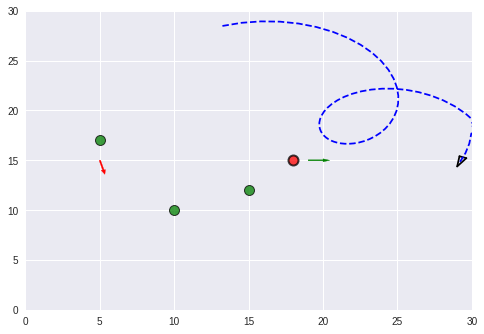

Step 68
Action:  [[-0.6228195  1.2389029]]
obs= [[ 2.8747019e+01  1.4054439e+01 -1.3747020e+01  9.4556177e-01
  -1.8305020e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.835712] done= [False]


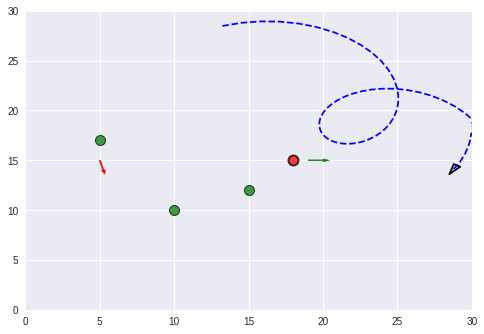

Step 69
Action:  [[-0.6228195  1.2389029]]
obs= [[ 2.8210251e+01  1.3355398e+01 -1.3210251e+01  1.6446016e+00
  -1.8306326e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.8692582] done= [False]


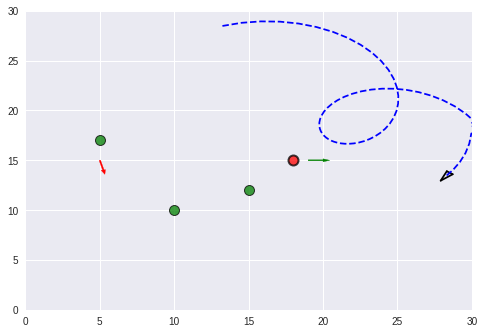

Step 70
Action:  [[-0.6228195  1.2389032]]
obs= [[   27.614824    12.760008   -12.614825     2.239992 -1830.7632
      6.           8.      ]] reward= [-2.8854852] done= [False]


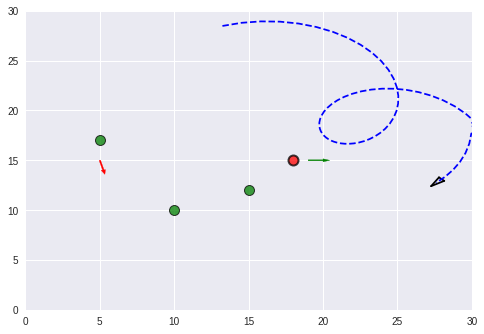

Step 71
Action:  [[-0.6228195  1.2389033]]
obs= [[   26.979395     12.272142    -11.979394      2.7278578 -1830.8938
      6.            8.       ]] reward= [-2.8854816] done= [False]


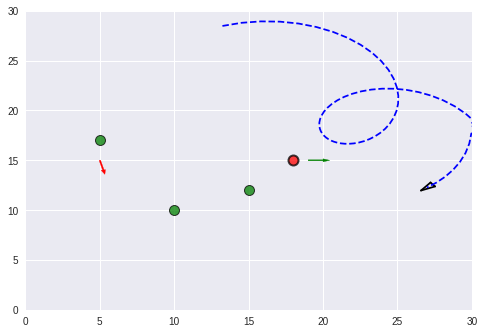

Step 72
Action:  [[-0.6228195  1.2389033]]
obs= [[   26.322348    11.892279   -11.322348     3.107721 -1831.0243
      6.           8.      ]] reward= [-2.8707252] done= [False]


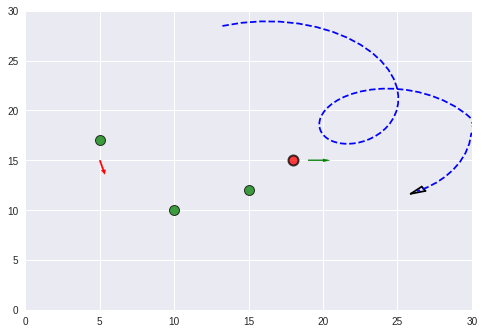

Step 73
Action:  [[-0.6228195  1.2389033]]
obs= [[   25.66118      11.617718    -10.6611805     3.3822823 -1831.1549
      6.            8.       ]] reward= [-2.8430068] done= [False]


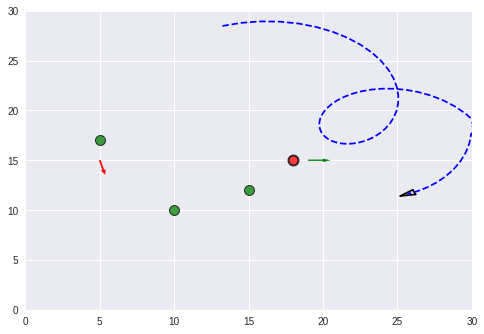

Step 74
Action:  [[-0.6228195  1.2389033]]
obs= [[   25.01194      11.442913    -10.01194       3.5570874 -1831.2855
      6.            8.       ]] reward= [-2.8043463] done= [False]


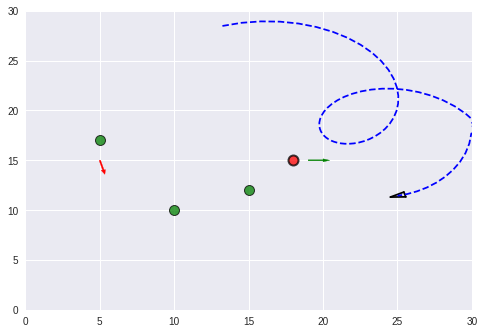

Step 75
Action:  [[-0.6228195  1.2389033]]
obs= [[   24.388756     11.359905     -9.388755      3.6400945 -1831.4161
      6.            8.       ]] reward= [-2.7569027] done= [False]


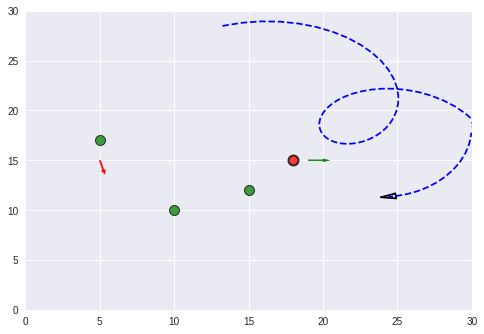

Step 76
Action:  [[-0.6228195  1.2389033]]
obs= [[   23.803486     11.358835     -8.803486      3.6411645 -1831.5466
      6.            8.       ]] reward= [-2.702885] done= [False]


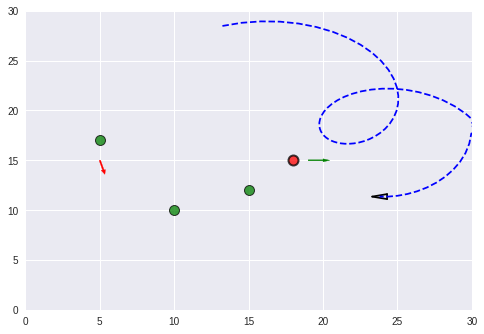

Step 77
Action:  [[-0.6228195  1.2389033]]
obs= [[   23.265495     11.4284935    -8.265496      3.5715067 -1831.6772
      6.            8.       ]] reward= [-2.644465] done= [False]


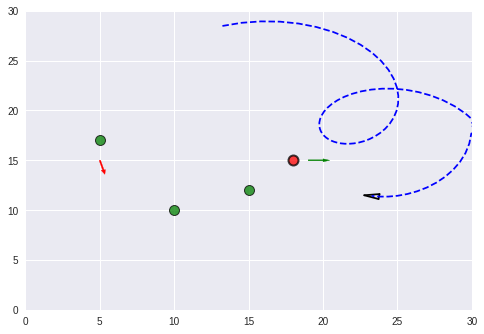

Step 78
Action:  [[-0.6228195  1.2389033]]
obs= [[   22.781546     11.556898     -7.7815456     3.4431016 -1831.8079
      6.            8.       ]] reward= [-2.5837002] done= [False]


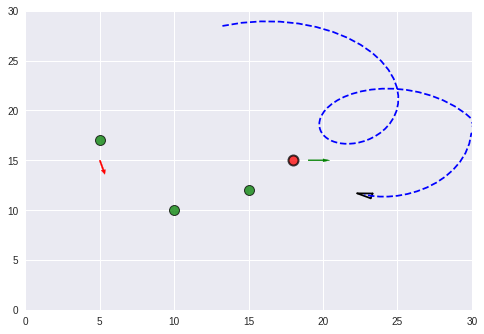

Step 79
Action:  [[-0.6228195  1.2389033]]
obs= [[   22.35582     11.731866    -7.35582      3.268134 -1831.9385
      6.           8.      ]] reward= [-2.5224648] done= [False]


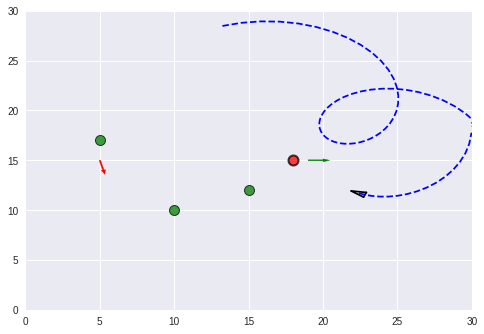

Step 80
Action:  [[-0.6228195  1.2389033]]
obs= [[   21.990074     11.941537     -6.9900737     3.0584636 -1832.0691
      6.            8.       ]] reward= [-2.4623954] done= [False]


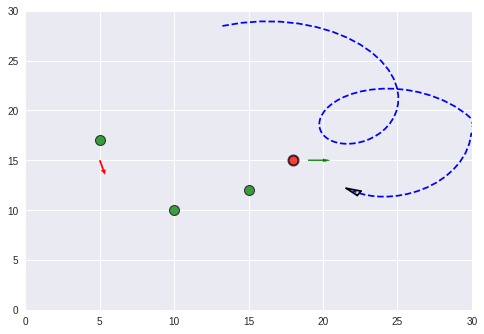

Step 81
Action:  [[-0.6228195  1.2389033]]
obs= [[   21.683882     12.174848     -6.6838818     2.8251526 -1832.1996
      6.            8.       ]] reward= [-2.4048538] done= [False]


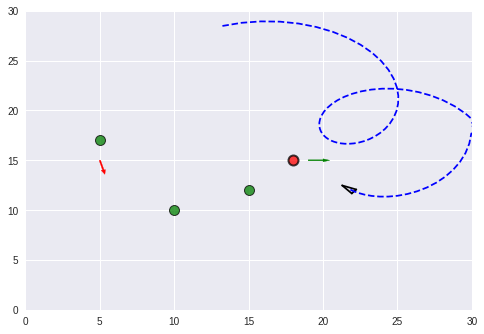

Step 82
Action:  [[-0.6228195  1.2389033]]
obs= [[   21.43498      12.42192      -6.4349813     2.5780807 -1832.3302
      6.            8.       ]] reward= [-2.3509035] done= [False]


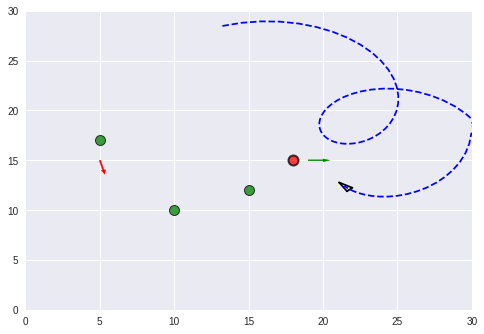

Step 83
Action:  [[-0.6228195  1.2389033]]
obs= [[   21.23968      12.674347     -6.2396793     2.325653  -1832.4608
      6.            8.       ]] reward= [-2.3013062] done= [False]


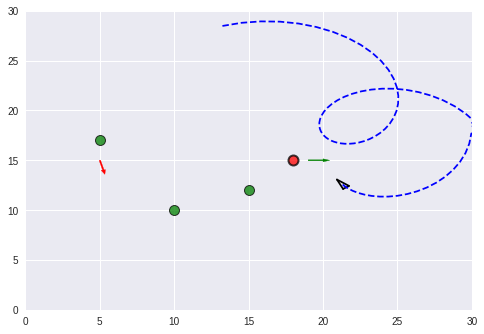

Step 84
Action:  [[-0.6228195  1.2389033]]
obs= [[   21.093304     12.925375     -6.093303      2.0746248 -1832.5914
      6.            8.       ]] reward= [-2.2565331] done= [False]


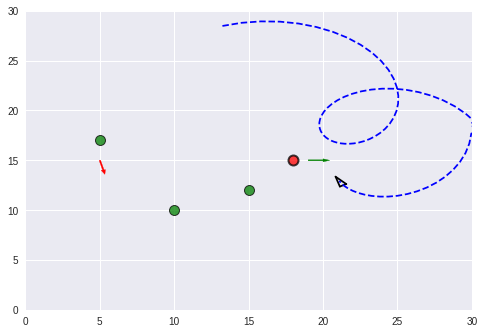

Step 85
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.0990667e+01  1.3169961e+01 -5.9906673e+00  1.8300388e+00
  -1.8327220e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.2167928] done= [False]


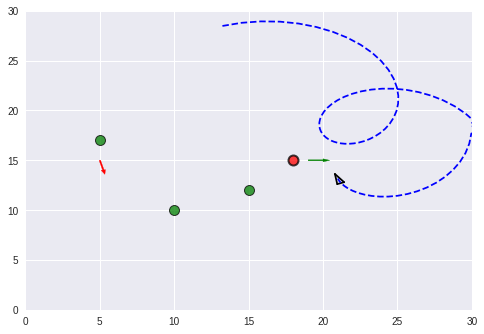

Step 86
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.0926523e+01  1.3404718e+01 -5.9265232e+00  1.5952812e+00
  -1.8328525e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.1820705] done= [False]


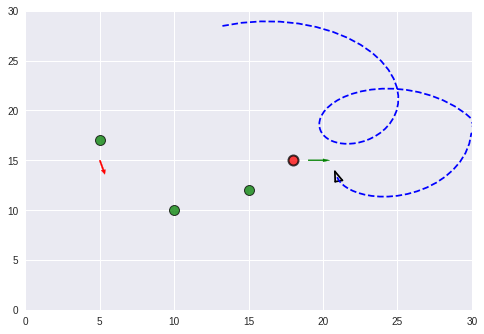

Step 87
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.0895971e+01  1.3627751e+01 -5.8959718e+00  1.3722485e+00
  -1.8329832e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.1521804] done= [False]


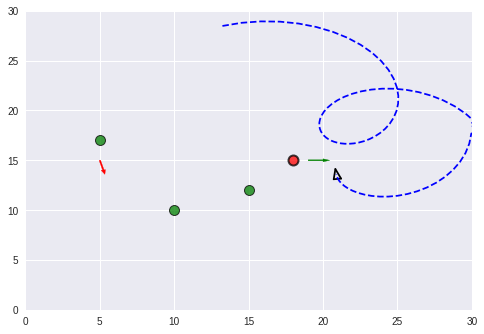

Step 88
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.0894804e+01  1.3838390e+01 -5.8948040e+00  1.1616100e+00
  -1.8331138e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.126822] done= [False]


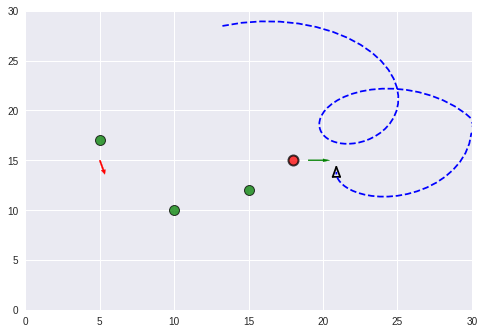

Step 89
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.0919752e+01  1.4036856e+01 -5.9197512e+00  9.6314448e-01
  -1.8332444e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.1056414] done= [False]


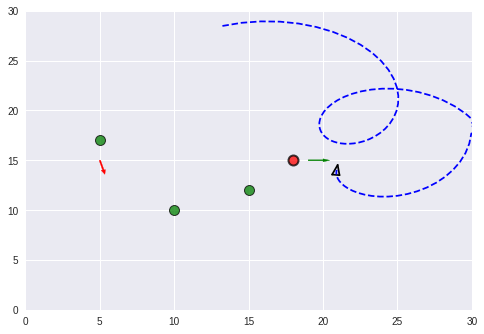

Step 90
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.0968630e+01  1.4223877e+01 -5.9686298e+00  7.7612329e-01
  -1.8333750e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.0882895] done= [False]


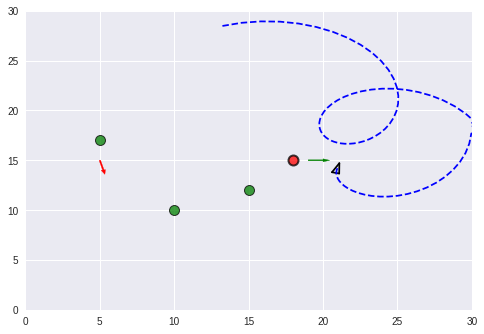

Step 91
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.1040371e+01  1.4400296e+01 -6.0403709e+00  5.9970343e-01
  -1.8335055e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.0744753] done= [False]


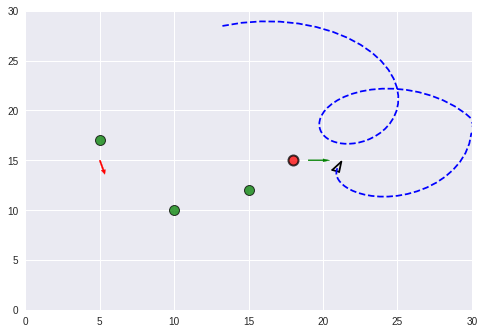

Step 92
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.1134945e+01  1.4566700e+01 -6.1349449e+00  4.3329996e-01
  -1.8336361e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.0640075] done= [False]


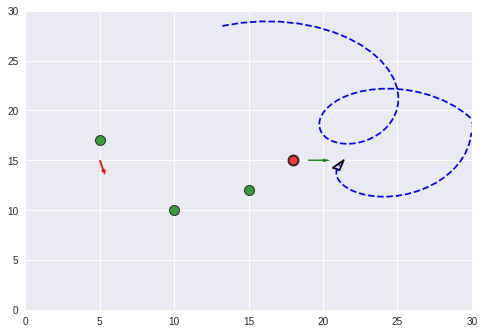

Step 93
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.1253193e+01  1.4723089e+01 -6.2531939e+00  2.7691051e-01
  -1.8337667e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.0568244] done= [False]


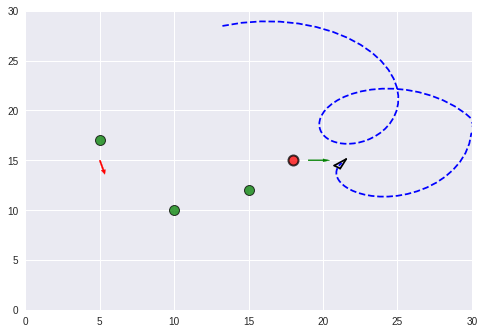

Step 94
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.1396591e+01  1.4868627e+01 -6.3965917e+00  1.3137384e-01
  -1.8338973e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.0530105] done= [False]


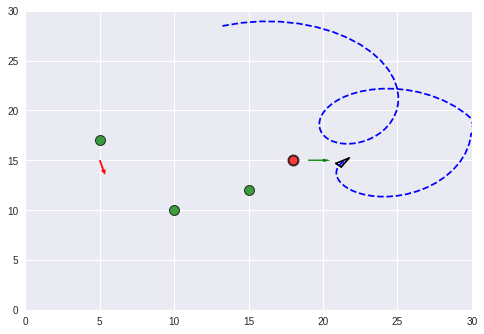

Step 95
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.1566950e+01  1.5001447e+01 -6.5669503e+00 -1.4468179e-03
  -1.8340280e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.0527966] done= [False]


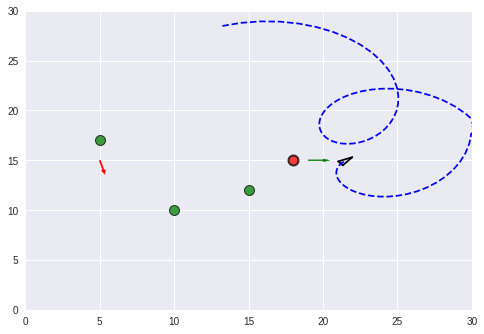

Step 96
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.1766090e+01  1.5118561e+01 -6.7660909e+00 -1.1856085e-01
  -1.8341584e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.0565503] done= [False]


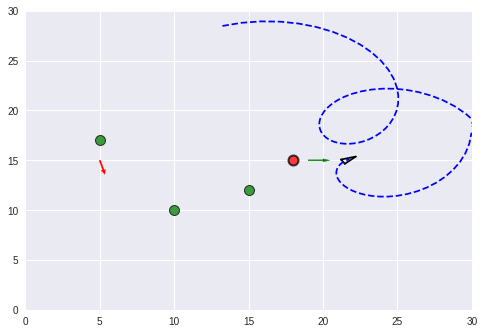

Step 97
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.1995499e+01  1.5215832e+01 -6.9954977e+00 -2.1583135e-01
  -1.8342891e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.064753] done= [False]


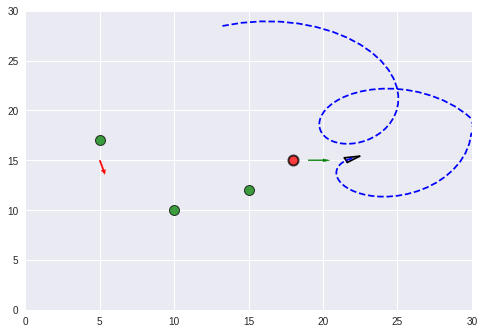

Step 98
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.2255968e+01  1.5288042e+01 -7.2559671e+00 -2.8804198e-01
  -1.8344197e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.0779667] done= [False]


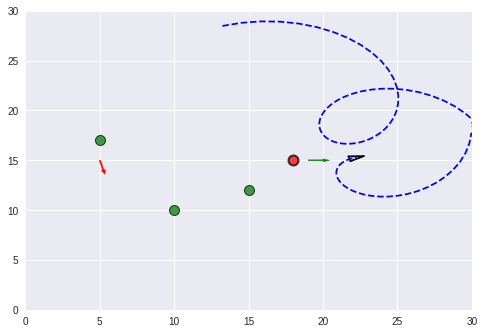

Step 99
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.2547277e+01  1.5329049e+01 -7.5472765e+00 -3.2904950e-01
  -1.8345503e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.0967925] done= [False]


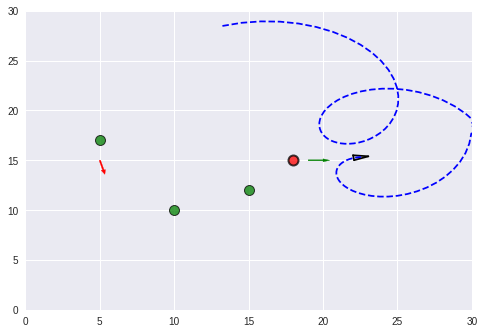

Step 100
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.2867887e+01  1.5332019e+01 -7.8678885e+00 -3.3201867e-01
  -1.8346809e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.1218226] done= [False]


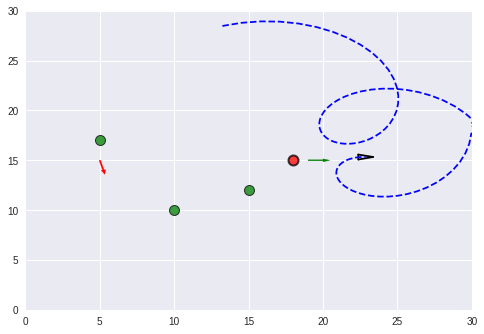

Step 101
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.3214710e+01  1.5289731e+01 -8.2147102e+00 -2.8973132e-01
  -1.8348114e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.1535869] done= [False]


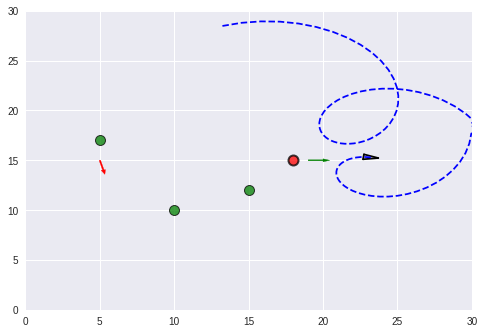

Step 102
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.3582928e+01  1.5194957e+01 -8.5829277e+00 -1.9495669e-01
  -1.8349420e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.192498] done= [False]


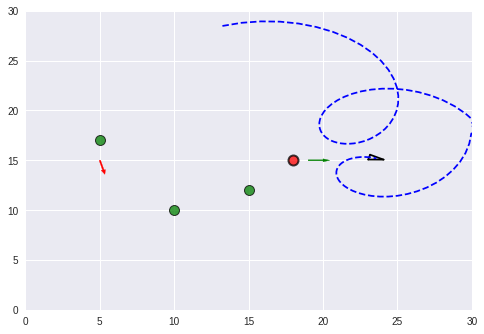

Step 103
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.3965929e+01  1.5040866e+01 -8.9659290e+00 -4.0865585e-02
  -1.8350726e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.2387972] done= [False]


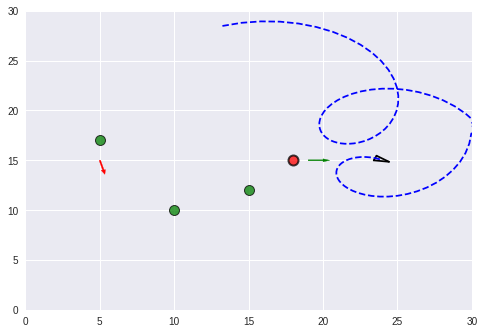

Step 104
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.4355324e+01  1.4821467e+01 -9.3553228e+00  1.7853257e-01
  -1.8352032e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.2925065] done= [False]


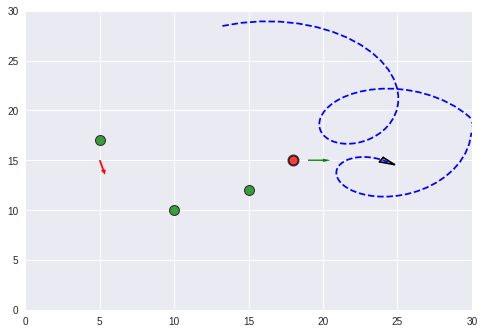

Step 105
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.4741066e+01  1.4532046e+01 -9.7410660e+00  4.6795329e-01
  -1.8353337e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.3533854] done= [False]


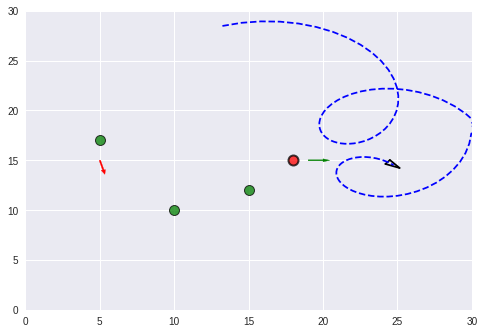

Step 106
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.5111691e+01  1.4169574e+01 -1.0111690e+01  8.3042580e-01
  -1.8354644e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.420902] done= [False]


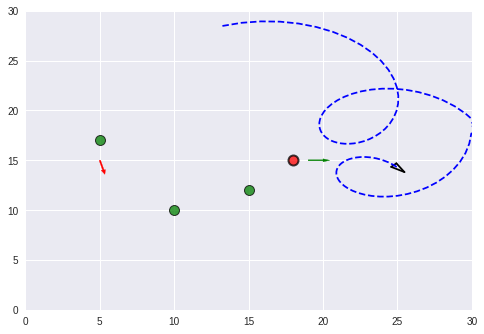

Step 107
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.5454628e+01  1.3733069e+01 -1.0454628e+01  1.2669307e+00
  -1.8355950e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.4942117] done= [False]


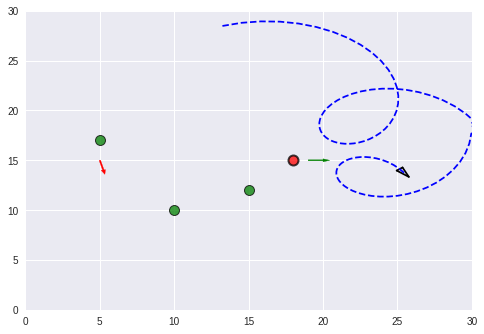

Step 108
Action:  [[-0.6228195  1.2389033]]
obs= [[ 2.5756626e+01  1.3223891e+01 -1.0756626e+01  1.7761091e+00
  -1.8357256e+03  6.0000000e+00  8.0000000e+00]] reward= [-2.572156] done= [False]


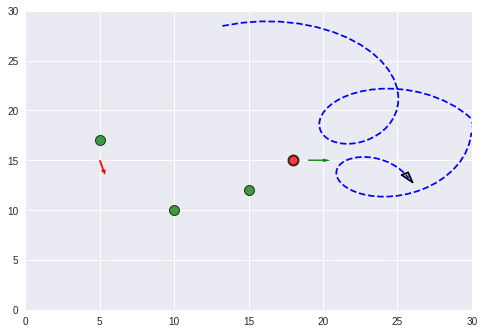

Step 109
Action:  [[-0.6228195  1.2389033]]
obs= [[   26.004221     12.645938    -11.004221      2.3540623 -1835.8562
      6.            8.       ]] reward= [-2.6532736] done= [False]


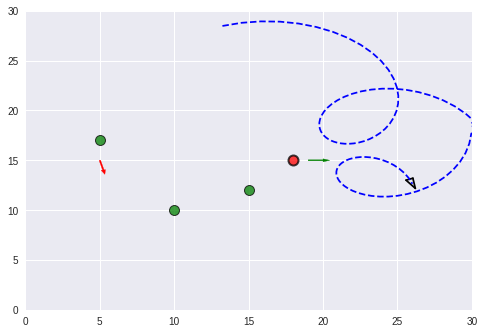

Step 110
Action:  [[-0.6228195  1.2389033]]
obs= [[   26.184269     12.005743    -11.184268      2.9942565 -1835.9867
      6.            8.       ]] reward= [-2.7358284] done= [False]


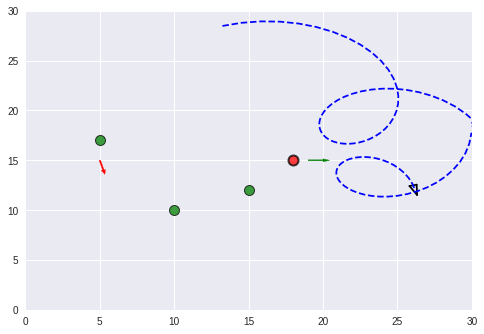

Step 111
Action:  [[-0.6228195  1.2389033]]
obs= [[   26.28449     11.312456   -11.284491     3.687544 -1836.1173
      6.           8.      ]] reward= [-2.8178525] done= [False]


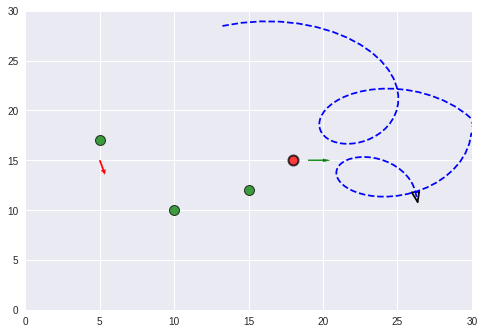

Step 112
Action:  [[-0.6228195  1.2389033]]
obs= [[   26.294025     10.577698    -11.294026      4.4223022 -1836.2479
      6.            8.       ]] reward= [-2.8972034] done= [False]


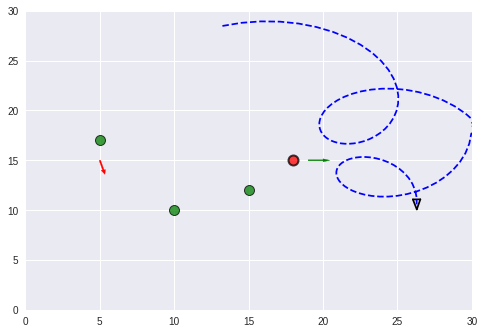

Step 113
Action:  [[-0.6228195  1.2389033]]
obs= [[   26.203943     9.815309   -11.203943     5.184692 -1836.3785
      6.           8.      ]] reward= [-2.971633] done= [False]


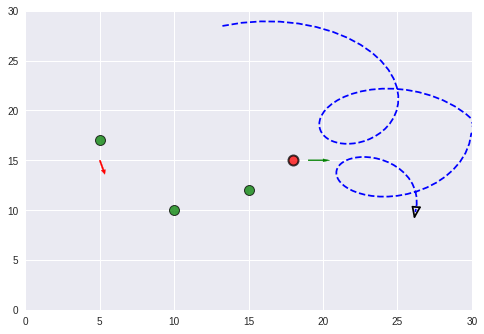

Step 114
Action:  [[-0.6228195  1.2389033]]
obs= [[   26.007706      9.040976    -11.007705      5.9590244 -1836.5092
      6.            8.       ]] reward= [-3.0388634] done= [False]


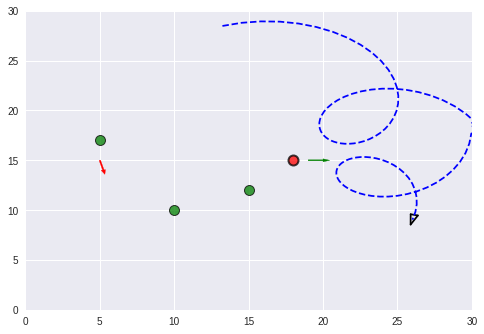

Step 115
Action:  [[-0.6228195  1.2389033]]
obs= [[   25.701551     8.271771   -10.701551     6.728228 -1836.6396
      6.           8.      ]] reward= [-3.096673] done= [False]


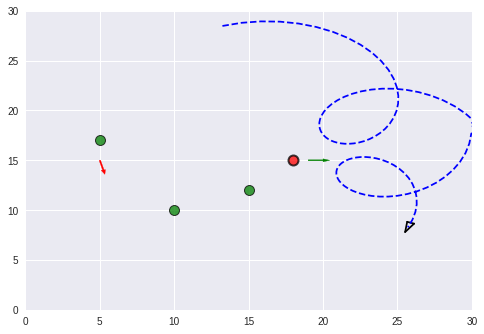

Step 116
Action:  [[-0.6228195  1.2389033]]
obs= [[   25.284782     7.525608   -10.284781     7.474392 -1836.7703
      6.           8.      ]] reward= [-3.142978] done= [False]


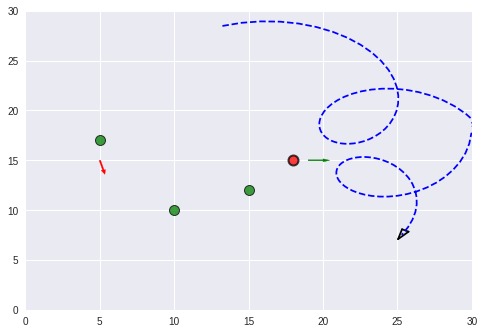

Step 117
Action:  [[-0.6228195  1.2389033]]
obs= [[   24.759928      6.8206363    -9.759929      8.179364  -1836.9009
      6.            8.       ]] reward= [-3.1759174] done= [False]


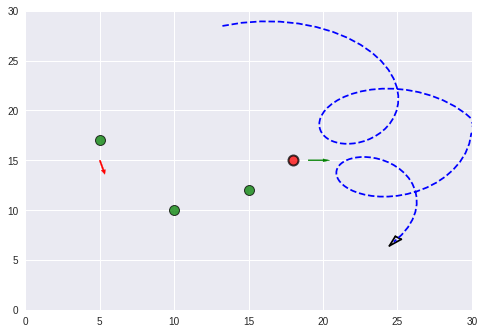

Step 118
Action:  [[-0.6228195  1.2389033]]
obs= [[   24.132795      6.1746154    -9.132796      8.825385  -1837.0315
      6.            8.       ]] reward= [-3.1939292] done= [False]


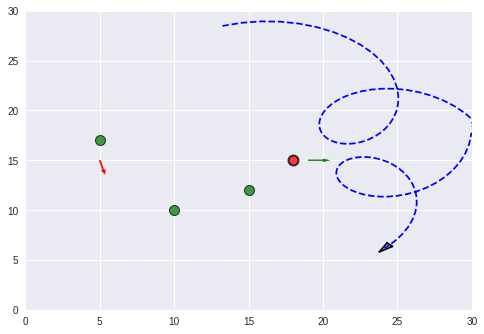

Step 119
Action:  [[-0.6228195  1.2389033]]
obs= [[   23.412376     5.604279    -8.412376     9.395721 -1837.1621
      6.           8.      ]] reward= [-3.1958182] done= [False]


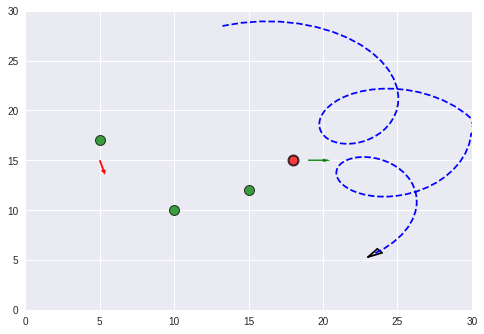

Step 120
Action:  [[-0.6228195  1.2389033]]
obs= [[   22.610636      5.1247225    -7.6106353     9.8752775 -1837.2926
      6.            8.       ]] reward= [-3.1808097] done= [False]


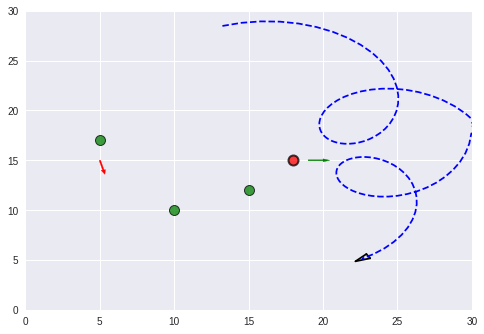

Step 121
Action:  [[-0.6228195  1.2389033]]
obs= [[   21.742168      4.748846     -6.7421684    10.251154  -1837.4232
      6.            8.       ]] reward= [-3.1485913] done= [False]


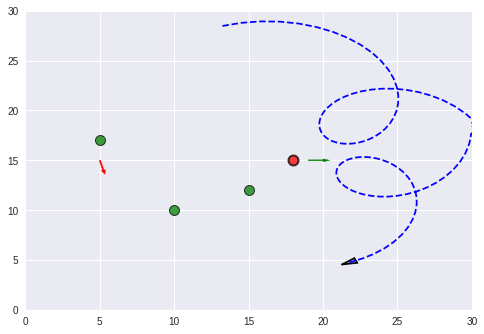

Step 122
Action:  [[-0.6228195  1.2389033]]
obs= [[   20.823761      4.4868674    -5.8237605    10.513132  -1837.5538
      6.            8.       ]] reward= [-3.0993323] done= [False]


KeyboardInterrupt: ignored

In [8]:
obs = env.reset()
n_steps = 500
for step in range(n_steps):
  action, _ = model.predict(obs, deterministic=True)
  print("Step {}".format(step + 1))
  print("Action: ", action)
  obs, reward, done, info = env.step(action)
  print('obs=', obs, 'reward=', reward, 'done=', done)
  env.render(mode='console')
  if done:
    # Note that the VecEnv resets automatically
    # when a done signal is encountered
    print("Goal reached!", "reward=", reward)
    break

Initial x: 17.33 m
Initial y: 1.11 m
Initial theta: -2.13 rad

Goal x: 19.00 m
Goal y: 15.00 m
Goal theta: 0.00 rad



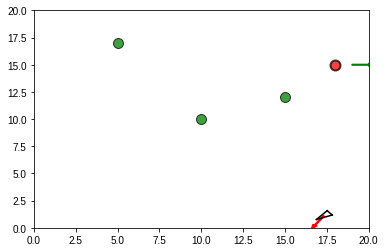

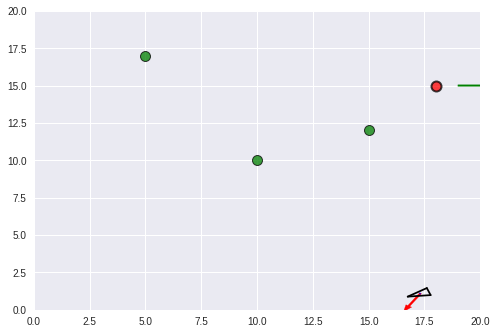

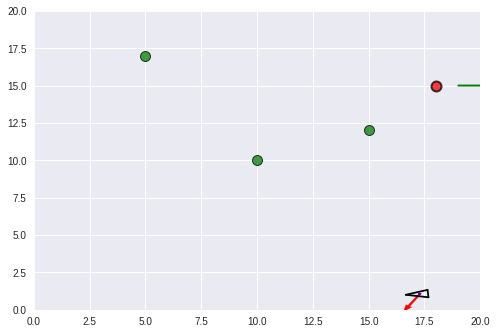

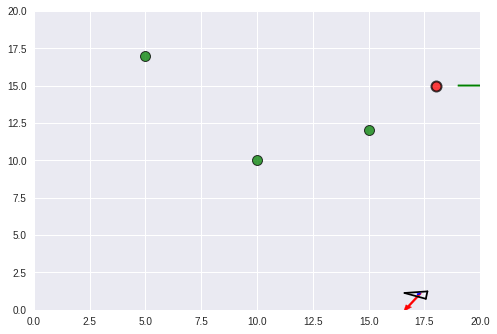

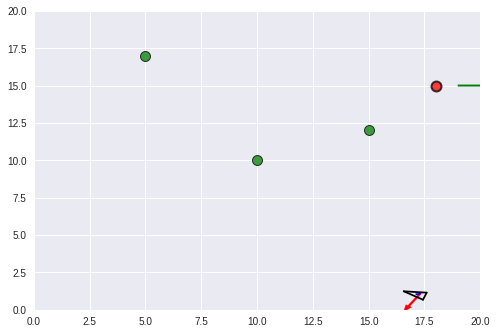

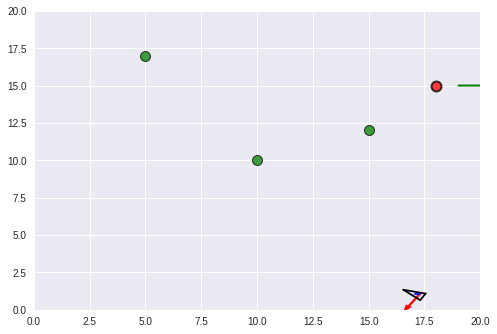

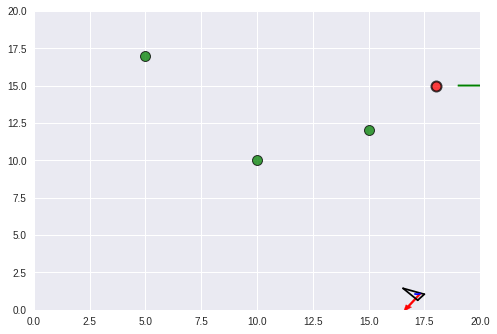

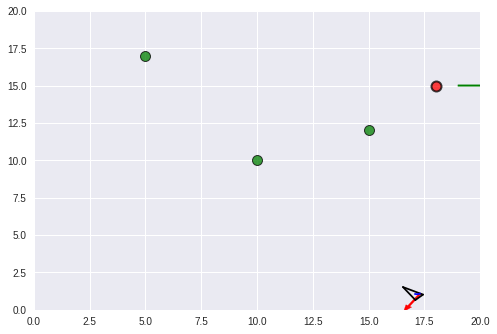

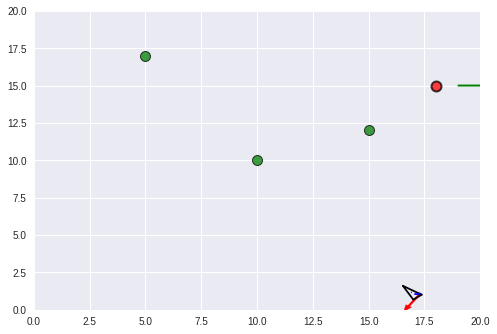

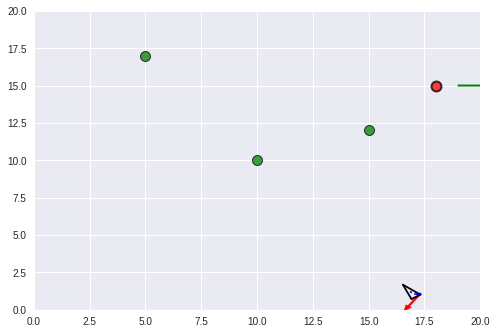

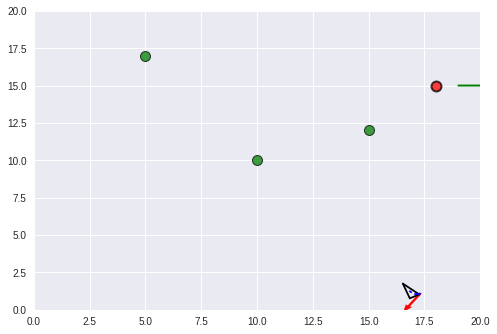

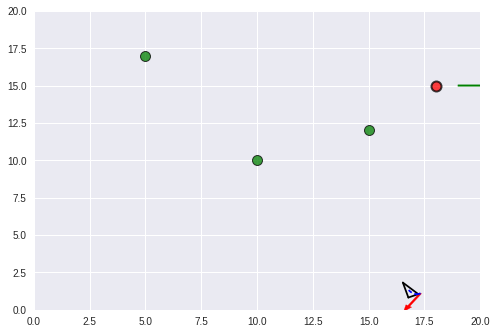

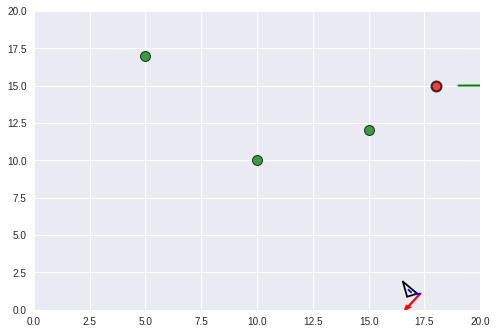

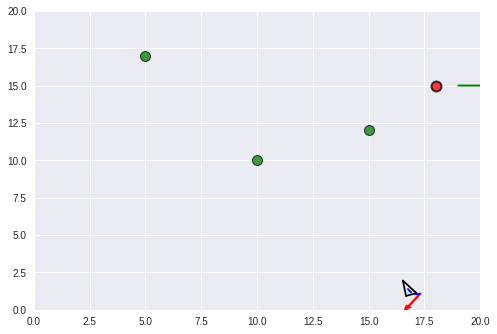

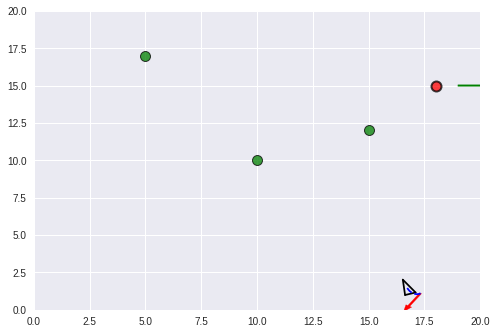

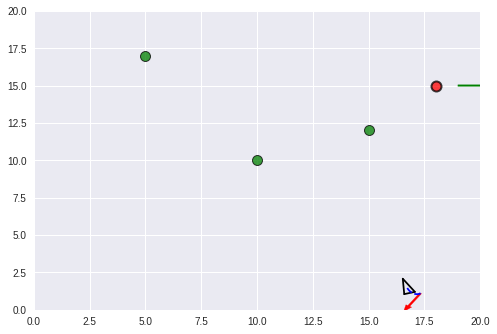

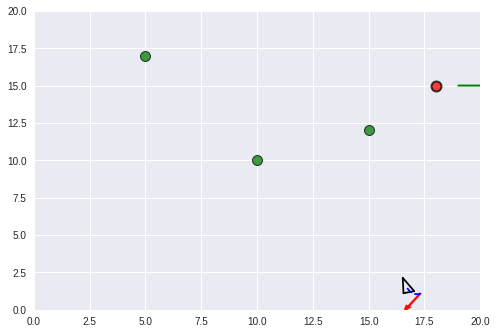

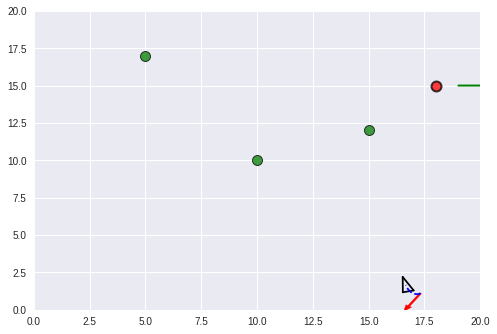

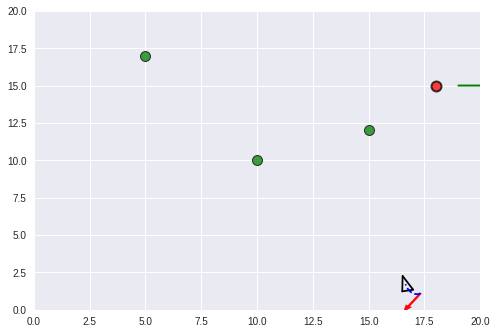

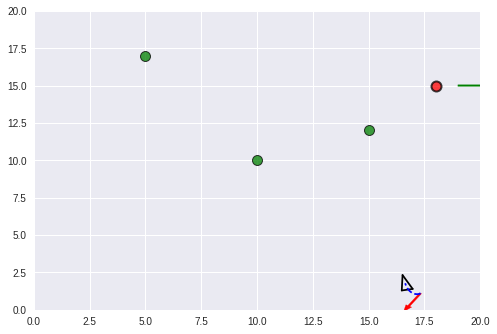

KeyboardInterrupt: ignored

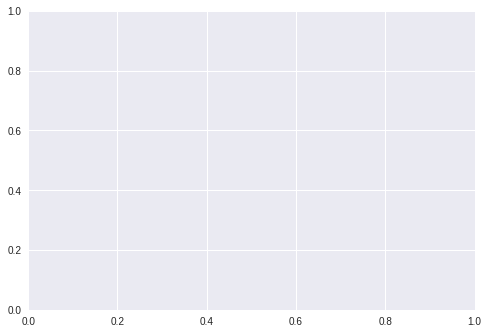

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from random import random

# simulation parameters
Kp_rho = 9
Kp_alpha = 15
Kp_beta = -3
dt = 0.01

show_animation = True


def move_to_pose(x_start, y_start, theta_start, x_goal, y_goal, theta_goal):
    """
    rho is the distance between the robot and the goal position
    alpha is the angle to the goal relative to the heading of the robot
    beta is the angle between the robot's position and the goal position plus the goal angle
    Kp_rho*rho and Kp_alpha*alpha drive the robot along a line towards the goal
    Kp_beta*beta rotates the line so that it is parallel to the goal angle
    """
    x = x_start
    y = y_start
    theta = theta_start

    x_diff = x_goal - x
    y_diff = y_goal - y

    x_traj, y_traj = [], []

    rho = np.hypot(x_diff, y_diff)
    while rho > 0.001:
        x_traj.append(x)
        y_traj.append(y)

        x_diff = x_goal - x
        y_diff = y_goal - y

        # Restrict alpha and beta (angle differences) to the range
        # [-pi, pi] to prevent unstable behavior e.g. difference going
        # from 0 rad to 2*pi rad with slight turn

        rho = np.hypot(x_diff, y_diff) # calculates hypotenuse of x_diff and y_diff. ## reward is also a function of rho 
        alpha = (np.arctan2(y_diff, x_diff) 
                    - theta + np.pi) % (2 * np.pi) - np.pi ## approximated by nn , reward is a function of true value of alpha 
        #alpha=0.1
        #beta=0.2     
        beta = (theta_goal - theta - alpha + np.pi) % (2 * np.pi) - np.pi ## approximated by nn , reward is a function of true value of beta 

        v = Kp_rho * rho
        w = Kp_alpha * alpha + Kp_beta * beta

        if alpha > np.pi / 2 or alpha < -np.pi / 2:
            v = -v

        theta = theta + w * dt
        x = x + 6 * np.cos(theta) * dt
        y = y + 6 * np.sin(theta) * dt

        if show_animation:  # pragma: no cover
            plt.cla()
            plt.arrow(x_start, y_start, np.cos(theta_start),
                      np.sin(theta_start), color='r', width=0.1)
            plt.arrow(x_goal, y_goal, np.cos(theta_goal),
                      np.sin(theta_goal), color='g', width=0.1)
            plot_vehicle(x, y, theta, x_traj, y_traj)


def plot_vehicle(x, y, theta, x_traj, y_traj):  # pragma: no cover
    # Corners of triangular vehicle when pointing to the right (0 radians)
    p1_i = np.array([0.5, 0, 1]).T
    p2_i = np.array([-0.5, 0.25, 1]).T
    p3_i = np.array([-0.5, -0.25, 1]).T

    T = transformation_matrix(x, y, theta)
    p1 = np.matmul(T, p1_i)
    p2 = np.matmul(T, p2_i)
    p3 = np.matmul(T, p3_i)
    
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k-')
    plt.plot([p2[0], p3[0]], [p2[1], p3[1]], 'k-')
    plt.plot([p3[0], p1[0]], [p3[1], p1[1]], 'k-')
    plt.style.use('seaborn')
    plt.scatter([5,10,15],[17,10,12],s=100,c='green',edgecolor='black',linewidth=1,alpha=0.75) 
    plt.style.use('seaborn')
    plt.scatter([18],[15],s=100,c='red',edgecolor='black',linewidth=2,alpha=0.75)   
    plt.plot(x_traj, y_traj, 'b--')
    #circle1 = plt.Circle((0, 0), 0.2, color='r')
    #fig, ax = plt.subplots()
    
    # for stopping simulation with the esc key.
    plt.gcf().canvas.mpl_connect('key_release_event',
            lambda event: [exit(0) if event.key == 'escape' else None])
    
    plt.xlim(0, 20)
    plt.ylim(0, 20)
    
    plt.pause(dt)


def transformation_matrix(x, y, theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), x],
        [np.sin(theta), np.cos(theta), y],
        [0, 0, 1]
    ])


def main():

    for i in range(1):
        x_start = 20 * random()
        y_start = 20 * random()
        theta_start = 2 * np.pi * random() - np.pi
        x_goal = 19
        y_goal = 15
        theta_goal = 0 
        print("Initial x: %.2f m\nInitial y: %.2f m\nInitial theta: %.2f rad\n" %
              (x_start, y_start, theta_start))
        print("Goal x: %.2f m\nGoal y: %.2f m\nGoal theta: %.2f rad\n" %
              (x_goal, y_goal, theta_goal))
        move_to_pose(x_start, y_start, theta_start, x_goal, y_goal, theta_goal)


if __name__ == '__main__':
    main()

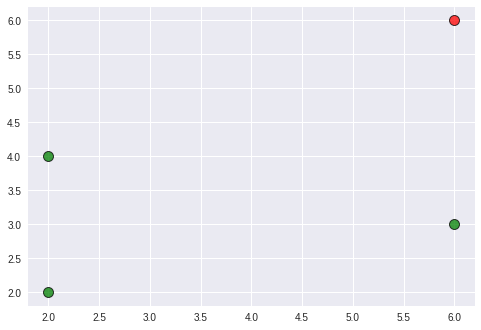

In [ ]:
plt.style.use('seaborn')
plt.scatter([2,3,6],[4,6,8],s=100,c='green',edgecolor='black',linewidth=1,alpha=0.75) 
plt.style.use('seaborn')
plt.scatter([20],[15],s=100,c='red',edgecolor='black',linewidth=1,alpha=0.75) 
